In [2]:
%matplotlib inline
#
# data manipulation and math
#
import numpy as np
import scipy as sp
import pandas as pd
#
# plotting and visualization
#
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#
import seaborn as sns
#
# modeling
#
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#
print("Loaded Libraries")

Loaded Libraries


In [3]:
# laading data into pannds dataframe 

hospital_data = pd.read_csv('Readmissions_and_Deaths.csv')

In [4]:
hospital_data.head()

index  Provider ID             Hospital Name                   Address  \
0      0       230100  TAWAS ST JOSEPH HOSPITAL               200 HEMLOCK   
1      1       230121       MEMORIAL HEALTHCARE      826 WEST KING STREET   
2      2       230118      HURON MEDICAL CENTER  1100 SOUTH VAN DYKE ROAD   
3      3       230121       MEMORIAL HEALTHCARE      826 WEST KING STREET   
4      4       230133  OTSEGO MEMORIAL HOSPITAL          825 N CENTER AVE   

         City State  ZIP Code County Name  Phone Number  \
0  TAWAS CITY    MI     48764       IOSCO    9893629301   
1      OWOSSO    MI     48867  SHIAWASSEE    9897235211   
2     BAD AXE    MI     48413       HURON    9892699521   
3      OWOSSO    MI     48867  SHIAWASSEE    9897235211   
4     GAYLORD    MI     49735      OTSEGO    9897312100   

                                        Measure Name          Measure ID  \
0  Rate of readmission after discharge from hospi...  READM_30_HOSP_WIDE   
1     Rate of readmission after hip/knee replacement   READM_30_HIP_KNEE   
2             Pneumonia (PN) 30-Day Readmission Rate         READM_30_PN   
3            Rate of readmission for stroke patients        READM_30_STK   
4           Heart failure (HF) 30-Day Mortality Rate          MORT_30_HF   

                  Compared to National Denominator Score Lower Estimate  \
0  No Different than the National Rate         438  13.9           12.6   
1  No Different than the National Rate         150   4.0            2.8   
2  No Different than the National Rate         205  16.7           13.8   
3  No Different than the National Rate          67  11.5            8.7   
4  No Different than the National Rate         102  13.4            9.9   

  Higher Estimate Footnote Measure Start Date Measure End Date  \
0            15.6      NaN         07/01/2014       06/30/2015   
1             5.7      NaN         07/01/2012       06/30/2015   
2            19.9      NaN         07/01/2012       06/30/2015   
3            14.9      NaN         07/01/2012       06/30/2015   
4            17.7      NaN         07/01/2012       06/30/2015   

                                            Location  
0  200 HEMLOCK\nTAWAS CITY, MI 48764\n(44.274911,...  
1  826 WEST KING STREET\nOWOSSO, MI 48867\n(43.00...  
2  1100 SOUTH VAN DYKE ROAD\nBAD AXE, MI 48413\n(...  
3  826 WEST KING STREET\nOWOSSO, MI 48867\n(43.00...  
4  825 N CENTER AVE\nGAYLORD, MI 49735\n(45.03537...

In [5]:
hospital_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64764 entries, 0 to 64763
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 64764 non-null  int64 
 1   Provider ID           64764 non-null  int64 
 2   Hospital Name         64764 non-null  object
 3   Address               64764 non-null  object
 4   City                  64764 non-null  object
 5   State                 64764 non-null  object
 6   ZIP Code              64764 non-null  int64 
 7   County Name           64582 non-null  object
 8   Phone Number          64764 non-null  int64 
 9   Measure Name          64764 non-null  object
 10  Measure ID            64764 non-null  object
 11  Compared to National  64764 non-null  object
 12  Denominator           64764 non-null  object
 13  Score                 64764 non-null  object
 14  Lower Estimate        64764 non-null  object
 15  Higher Estimate       64764 non-null

In [6]:
# dropping rows with missing numeric data

hospital_data = hospital_data[hospital_data['Denominator'] != 'Not Available'] 

In [7]:
hospital_data.dtypes

index                    int64
Provider ID              int64
Hospital Name           object
Address                 object
City                    object
State                   object
ZIP Code                 int64
County Name             object
Phone Number             int64
Measure Name            object
Measure ID              object
Compared to National    object
Denominator             object
Score                   object
Lower Estimate          object
Higher Estimate         object
Footnote                object
Measure Start Date      object
Measure End Date        object
Location                object
dtype: object

In [8]:
# converting numeric data to float64 dtype 

hospital_data['Denominator'] = pd.to_numeric(hospital_data['Score'])
hospital_data['Score'] = pd.to_numeric(hospital_data['Score'])
hospital_data['Lower Estimate'] = pd.to_numeric(hospital_data['Lower Estimate'])
hospital_data['Higher Estimate'] = pd.to_numeric(hospital_data['Higher Estimate'])

In [9]:
# changing data type of start data and end date to datetime dtype

hospital_data['Measure Start Date'] = pd.to_datetime(hospital_data['Measure Start Date'])
hospital_data['Measure End Date'] = pd.to_datetime(hospital_data['Measure End Date'])

In [10]:
hospital_data.dtypes

index                            int64
Provider ID                      int64
Hospital Name                   object
Address                         object
City                            object
State                           object
ZIP Code                         int64
County Name                     object
Phone Number                     int64
Measure Name                    object
Measure ID                      object
Compared to National            object
Denominator                    float64
Score                          float64
Lower Estimate                 float64
Higher Estimate                float64
Footnote                        object
Measure Start Date      datetime64[ns]
Measure End Date        datetime64[ns]
Location                        object
dtype: object

In [11]:
# removing columns irrelevant to data analysis

hospital_data = hospital_data.drop(columns=['Phone Number','Footnote', 'Provider ID', 'Address', 'ZIP Code', 'Phone Number', 'Location' ], axis=1)

In [12]:
hospital_data.head()

index             Hospital Name        City State County Name  \
0      0  TAWAS ST JOSEPH HOSPITAL  TAWAS CITY    MI       IOSCO   
1      1       MEMORIAL HEALTHCARE      OWOSSO    MI  SHIAWASSEE   
2      2      HURON MEDICAL CENTER     BAD AXE    MI       HURON   
3      3       MEMORIAL HEALTHCARE      OWOSSO    MI  SHIAWASSEE   
4      4  OTSEGO MEMORIAL HOSPITAL     GAYLORD    MI      OTSEGO   

                                        Measure Name          Measure ID  \
0  Rate of readmission after discharge from hospi...  READM_30_HOSP_WIDE   
1     Rate of readmission after hip/knee replacement   READM_30_HIP_KNEE   
2             Pneumonia (PN) 30-Day Readmission Rate         READM_30_PN   
3            Rate of readmission for stroke patients        READM_30_STK   
4           Heart failure (HF) 30-Day Mortality Rate          MORT_30_HF   

                  Compared to National  Denominator  Score  Lower Estimate  \
0  No Different than the National Rate         13.9   13.9            12.6   
1  No Different than the National Rate          4.0    4.0             2.8   
2  No Different than the National Rate         16.7   16.7            13.8   
3  No Different than the National Rate         11.5   11.5             8.7   
4  No Different than the National Rate         13.4   13.4             9.9   

   Higher Estimate Measure Start Date Measure End Date  
0             15.6         2014-07-01       2015-06-30  
1              5.7         2012-07-01       2015-06-30  
2             19.9         2012-07-01       2015-06-30  
3             14.9         2012-07-01       2015-06-30  
4             17.7         2012-07-01       2015-06-30

In [13]:
hospital_data['County Name'].isna().sum()

65

In [14]:
hospital_data = hospital_data.dropna(subset=['County Name'])

In [15]:
#Format Data so only state, measure, score are present
HD = hospital_data[["Measure Name", "Measure ID", "State", "County Name", "Score"]]

In [16]:
# Convert 'Score' column to numeric, forcing errors to NaN
HD['Score'] = pd.to_numeric(HD['Score'], errors='coerce')

# Check for non-numeric values that were converted to NaN
print(HD[HD['Score'].isna()])

# Drop rows where 'Score' is NaN (if any)
HD = HD.dropna(subset=['Score'])

# Aggregate the data to handle duplicates, here we take the mean of scores
# Make sure to exclude non-numeric columns from the aggregation
numeric_cols = HD.select_dtypes(include='number').columns
aggregated_HD = HD.groupby(['County Name', 'Measure Name', 'State'])[numeric_cols].mean().reset_index()

# Use pivot_table instead of pivot to handle duplicate entries
pivoted_HD = aggregated_HD.pivot_table(index='County Name', columns='Measure Name', values='Score', aggfunc='mean')

# Reset the index to turn 'State' back into a column
pivoted_HD.reset_index(inplace=True)

# Sort the DataFrame by 'State'
pivoted_HD.sort_values(by='County Name', inplace=True)

# Display the reshaped DataFrame
pivoted_HD.head()

Empty DataFrame
Columns: [Measure Name, Measure ID, State, County Name, Score]
Index: []


C:\Users\tarab\AppData\Local\Temp\ipykernel_6792\560395221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HD['Score'] = pd.to_numeric(HD['Score'], errors='coerce')


Measure Name County Name  \
0              ABBEVILLE   
1                 ACADIA   
2                    ADA   
3                  ADAIR   
4                  ADAMS   

Measure Name  Acute Myocardial Infarction (AMI) 30-Day Mortality Rate  \
0                                                           NaN         
1                                                           NaN         
2                                                     13.300000         
3                                                     12.700000         
4                                                     14.306667         

Measure Name  Acute Myocardial Infarction (AMI) 30-Day Readmission Rate  \
0                                                           NaN           
1                                                           NaN           
2                                                     14.900000           
3                                                     17.200000           
4                                                     16.791667           

Measure Name  Death rate for CABG  \
0                             NaN   
1                             NaN   
2                             3.1   
3                             NaN   
4                             4.0   

Measure Name  Death rate for chronic obstructive pulmonary disease (COPD) patients  \
0                                                      7.400000                      
1                                                      8.100000                      
2                                                      7.950000                      
3                                                      7.133333                      
4                                                      8.110417                      

Measure Name  Death rate for stroke patients  \
0                                        NaN   
1                                  16.700000   
2                                  16.000000   
3                                  16.500000   
4                                  14.202778   

Measure Name  Heart failure (HF) 30-Day Mortality Rate  \
0                                            11.600000   
1                                            14.300000   
2                                            14.000000   
3                                            13.166667   
4                                            12.679167   

Measure Name  Heart failure (HF) 30-Day Readmission Rate  \
0                                              21.100000   
1                                              22.500000   
2                                              19.650000   
3                                              22.133333   
4                                              21.595833   

Measure Name  Pneumonia (PN) 30-Day Mortality Rate  \
0                                           14.500   
1                                           18.300   
2                                           13.750   
3                                           16.025   
4                                           16.825   

Measure Name  Pneumonia (PN) 30-Day Readmission Rate  \
0                                          17.300000   
1                                          16.700000   
2                                          15.500000   
3                                          16.525000   
4                                          16.776667   

Measure Name  Rate of readmission after discharge from hospital (hospital-wide)  \
0                                                     15.700000                   
1                                                     15.700000                   
2                                                     14.466667                   
3                                                     14.850000                   
4                                                     15.421212                   

Measure Name  Rate of readmission after h

In [17]:
heart_disease = pivoted_HD[['County Name','Heart failure (HF) 30-Day Mortality Rate', 'Heart failure (HF) 30-Day Readmission Rate']].copy()
heart_disease.set_index('County Name', inplace=True)


In [18]:
heart_disease = heart_disease.merge(hospital_data[['County Name', 'State']], on='County Name', how='left')

In [19]:
heart_disease.head(15)

County Name  Heart failure (HF) 30-Day Mortality Rate  \
0    ABBEVILLE                                      11.6   
1    ABBEVILLE                                      11.6   
2    ABBEVILLE                                      11.6   
3    ABBEVILLE                                      11.6   
4    ABBEVILLE                                      11.6   
5    ABBEVILLE                                      11.6   
6    ABBEVILLE                                      11.6   
7    ABBEVILLE                                      11.6   
8       ACADIA                                      14.3   
9       ACADIA                                      14.3   
10      ACADIA                                      14.3   
11      ACADIA                                      14.3   
12      ACADIA                                      14.3   
13      ACADIA                                      14.3   
14      ACADIA                                      14.3   

    Heart failure (HF) 30-Day Readmission Rate State  
0                                         21.1    SC  
1                                         21.1    SC  
2                                         21.1    SC  
3                                         21.1    SC  
4                                         21.1    SC  
5                                         21.1    SC  
6                                         21.1    SC  
7                                         21.1    SC  
8                                         22.5    LA  
9                                         22.5    LA  
10                                        22.5    LA  
11                                        22.5    LA  
12                                        22.5    LA  
13                                        22.5    LA  
14                                        22.5    LA

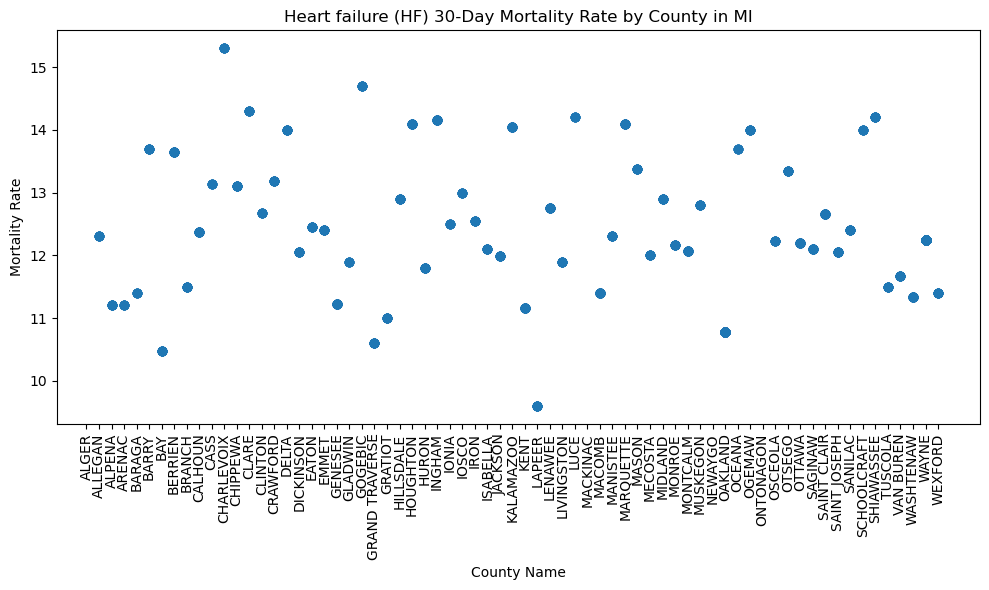

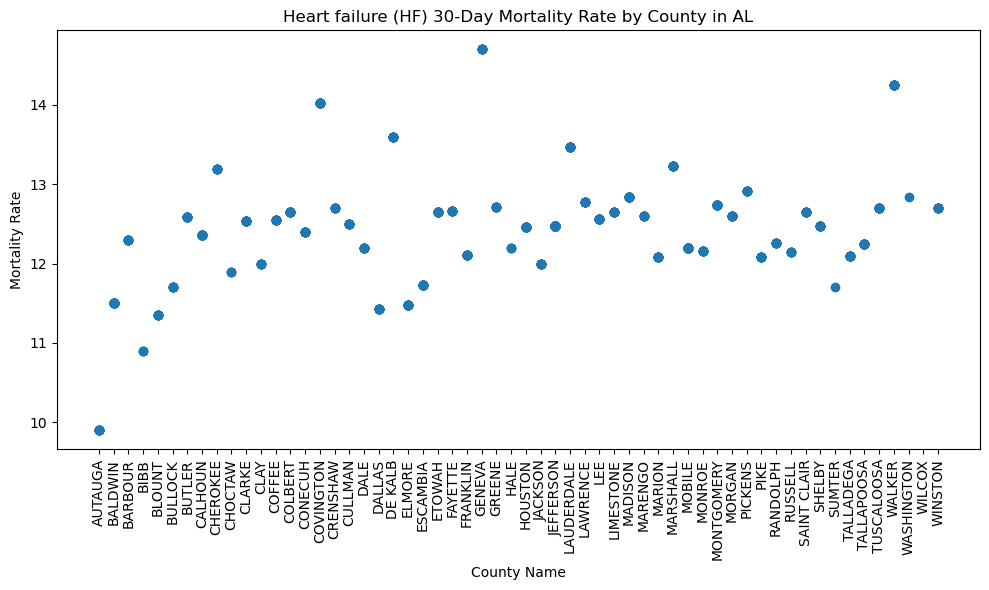

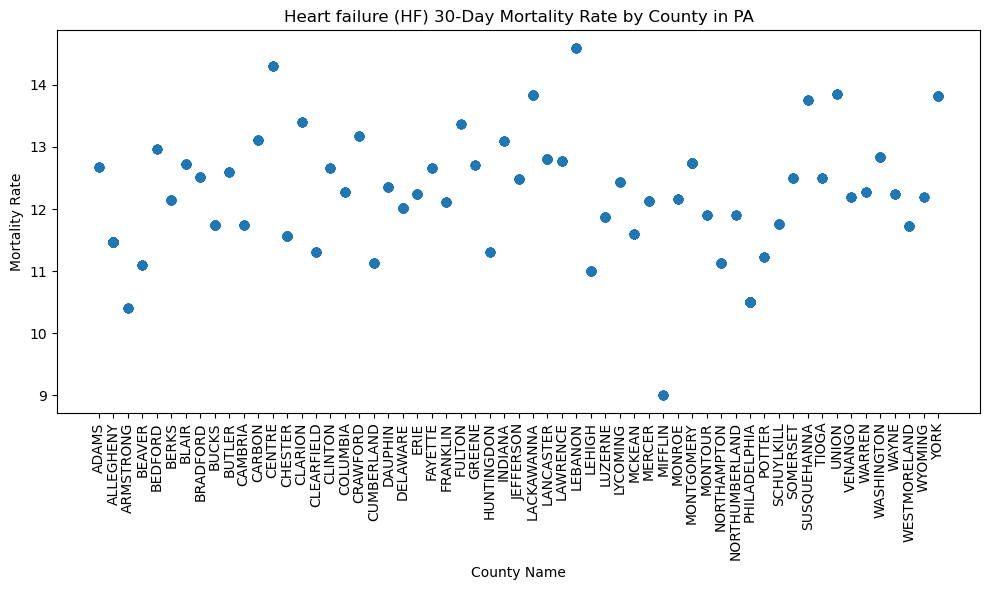

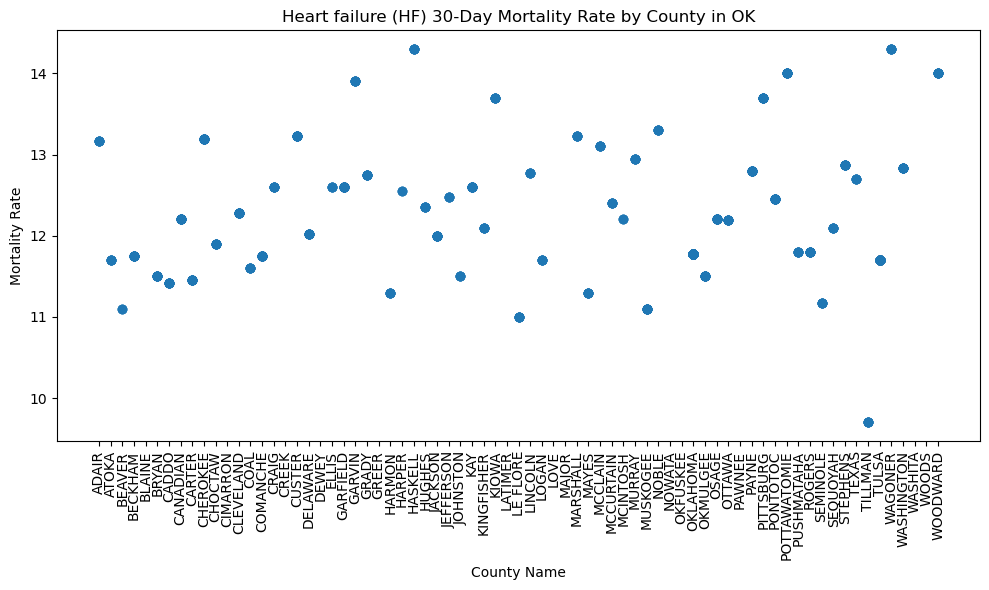

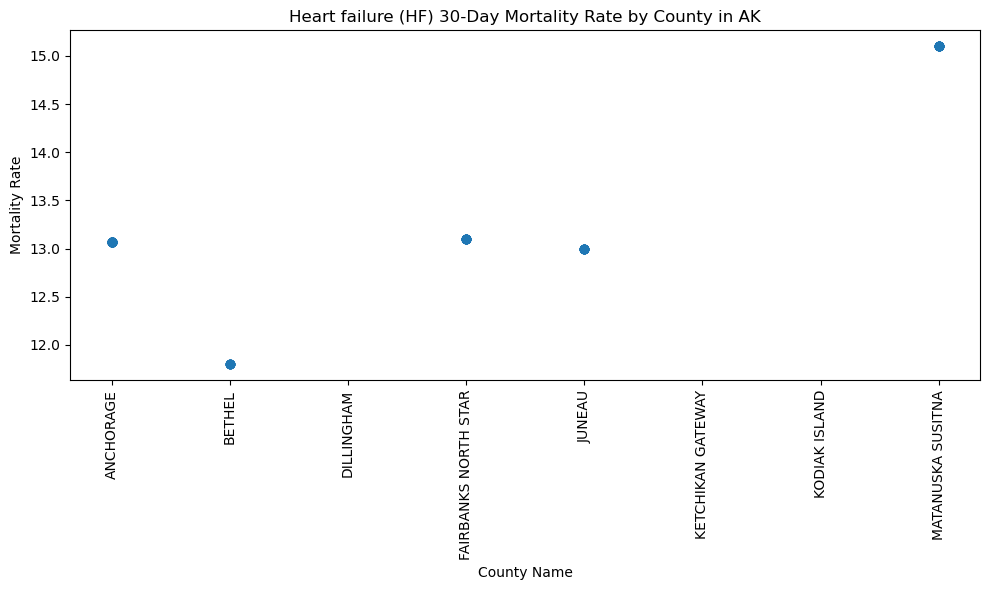

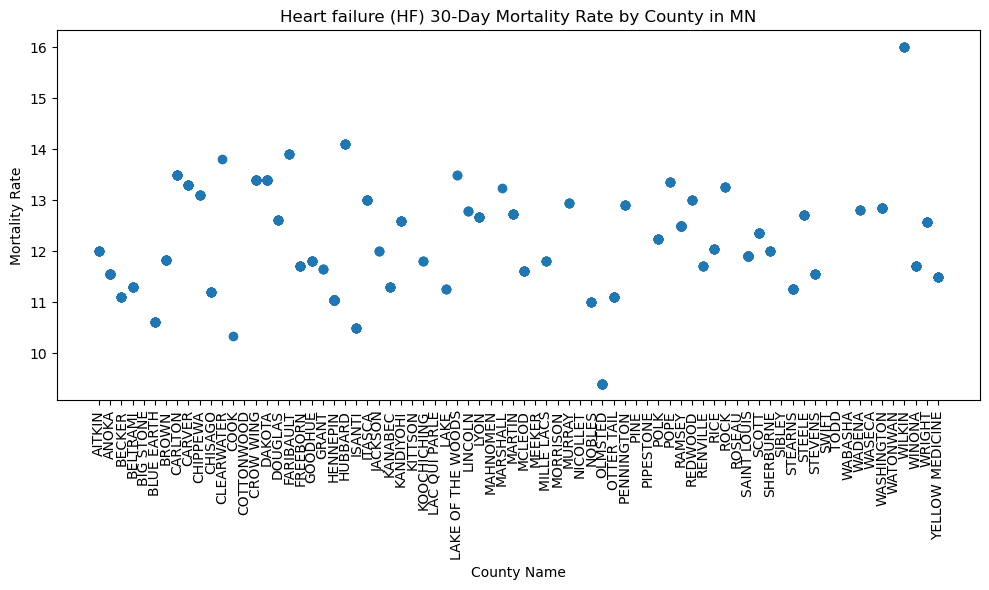

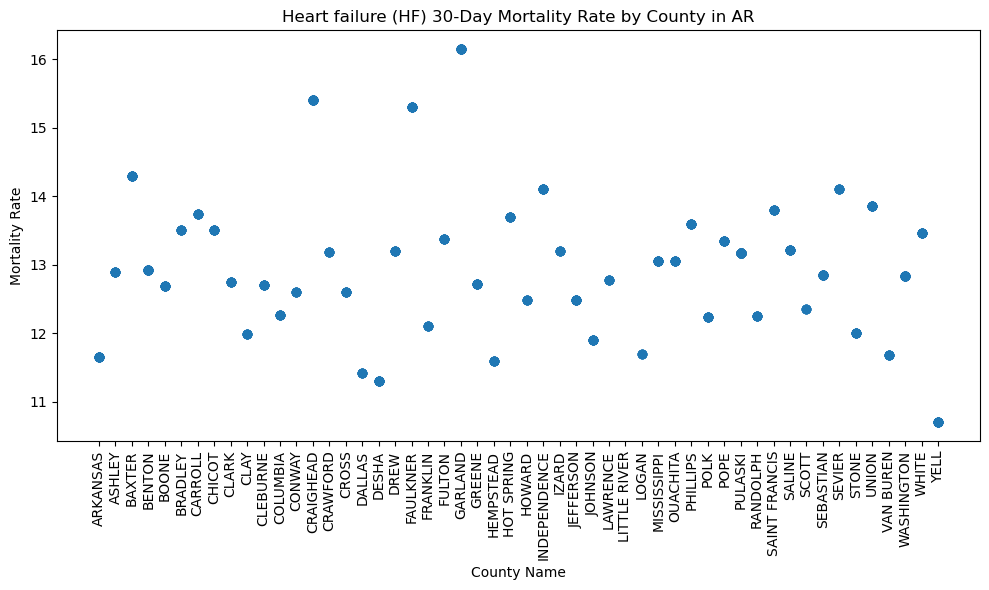

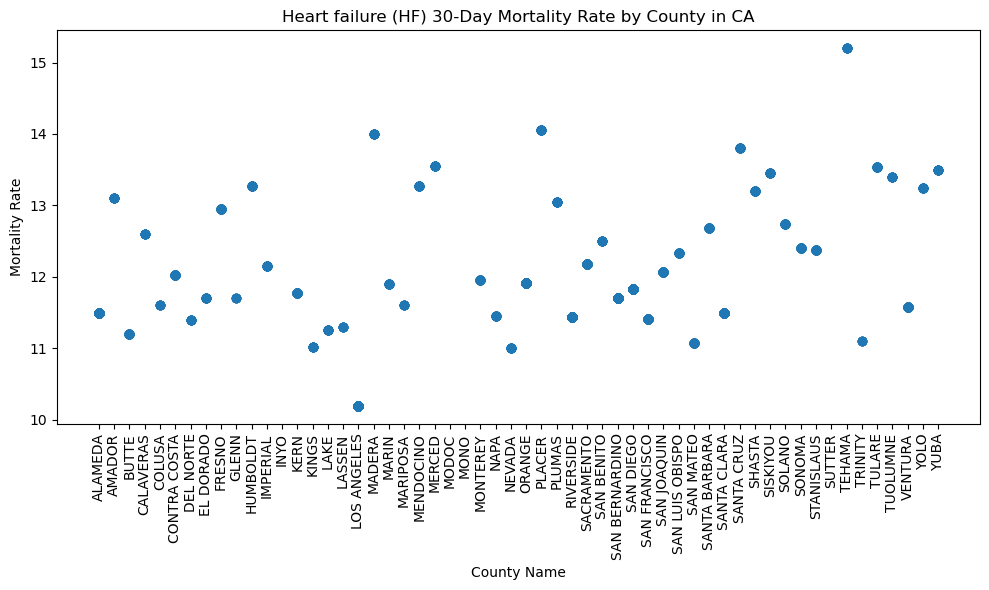

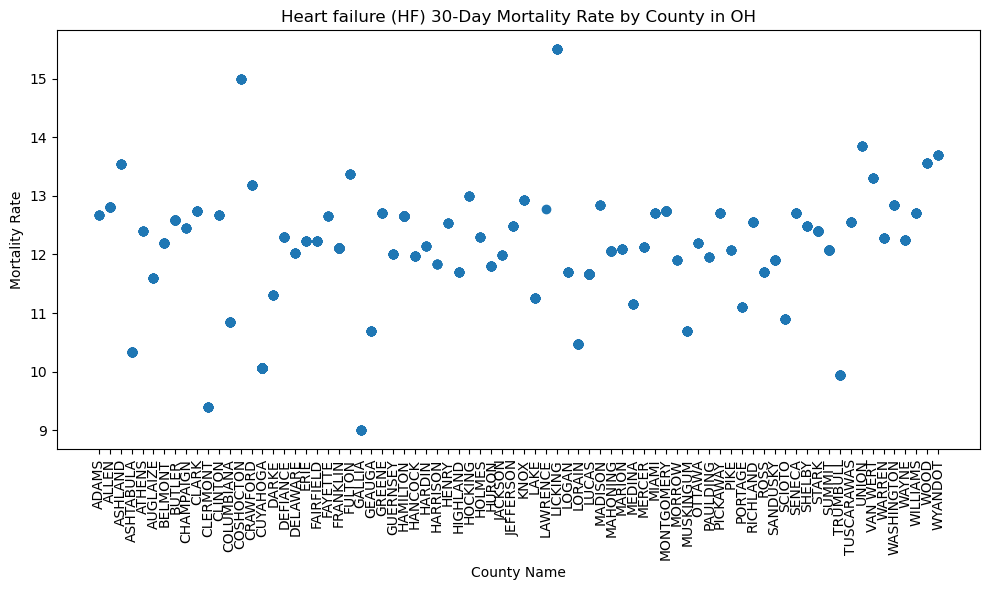

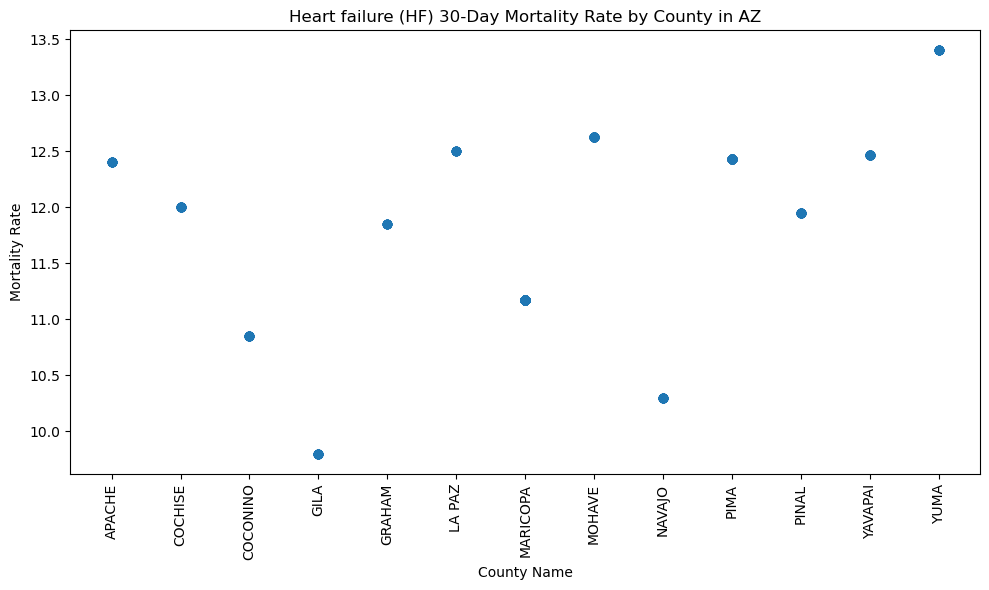

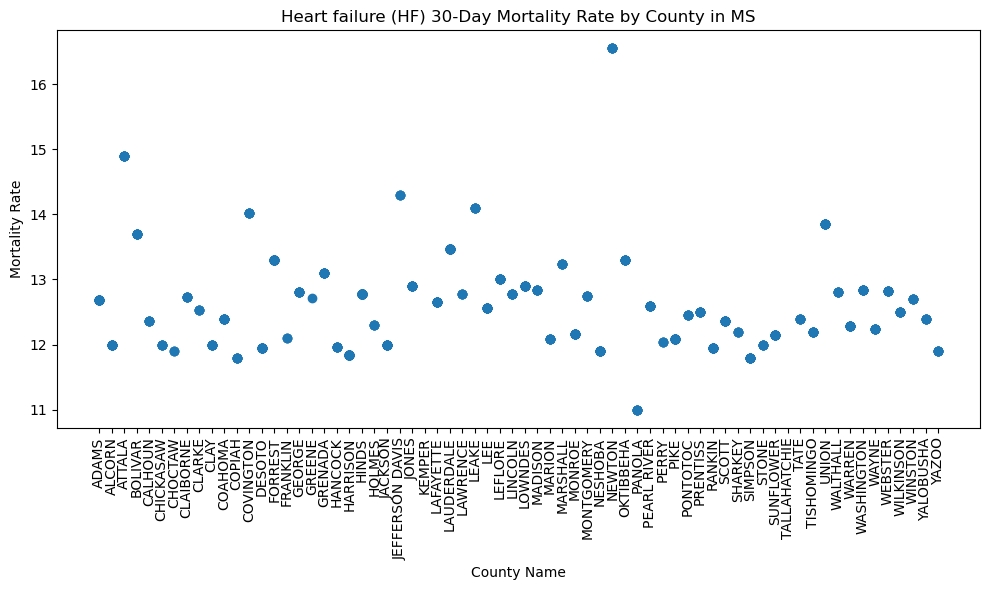

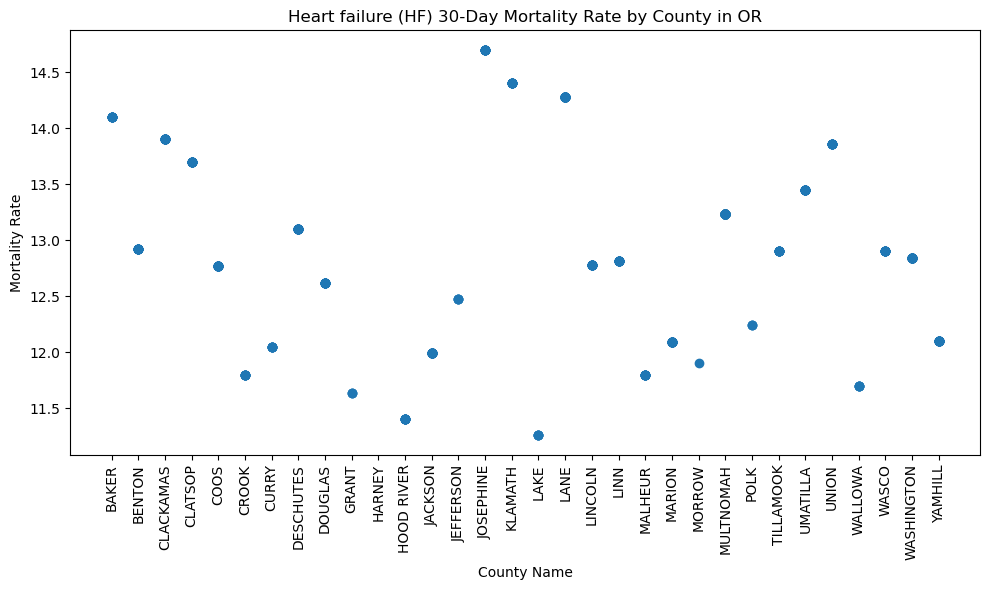

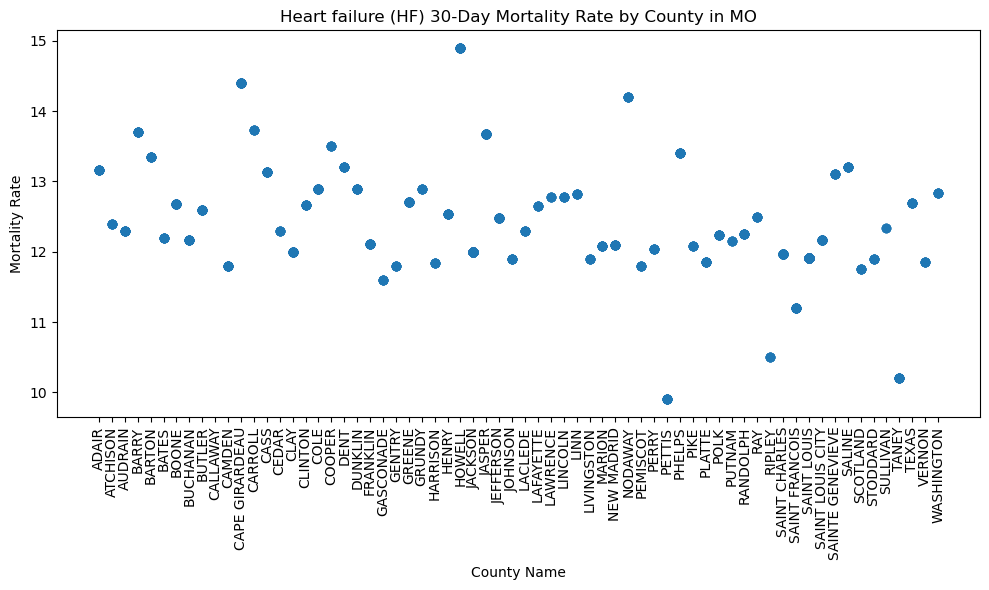

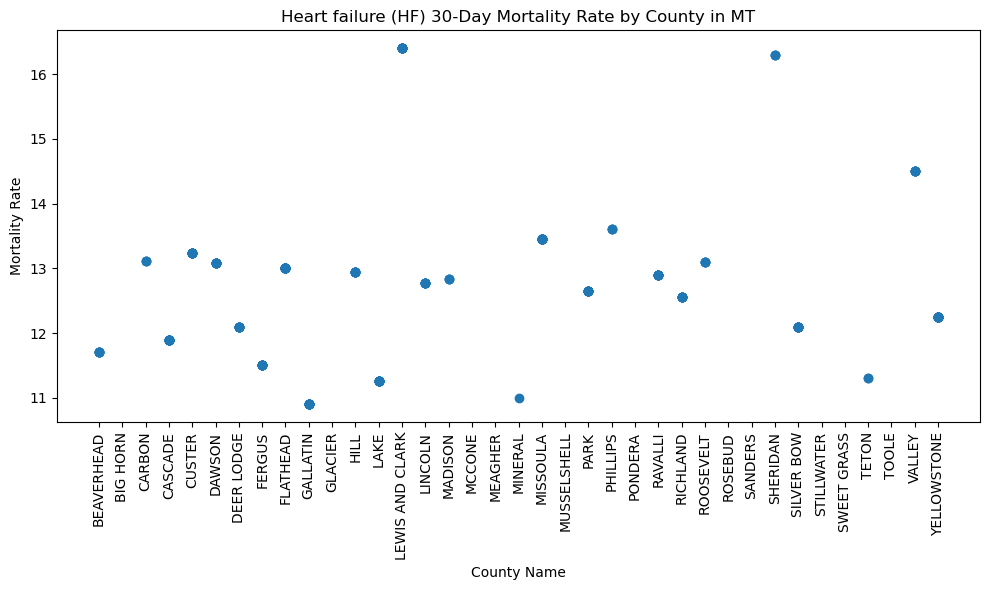

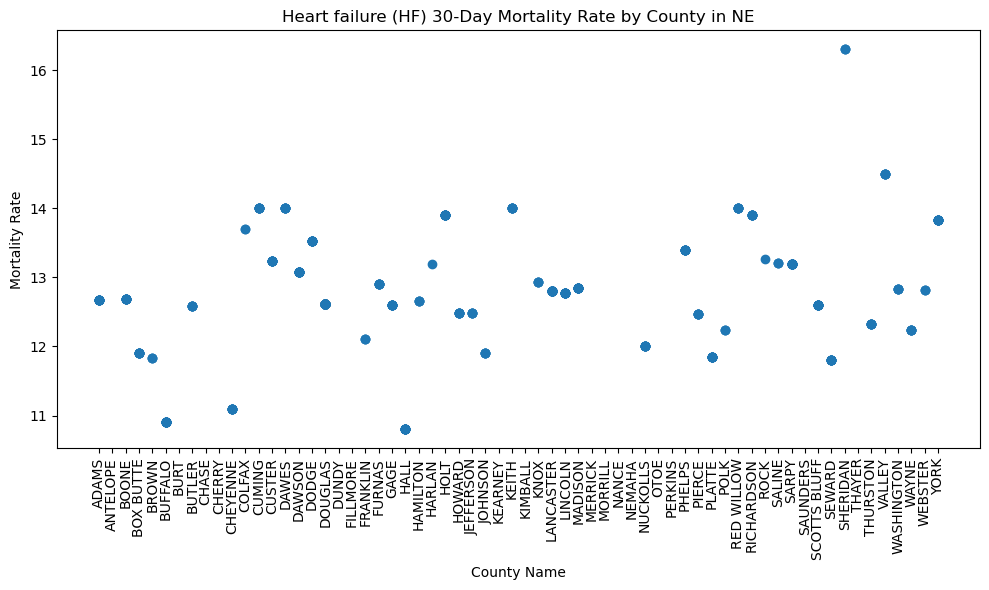

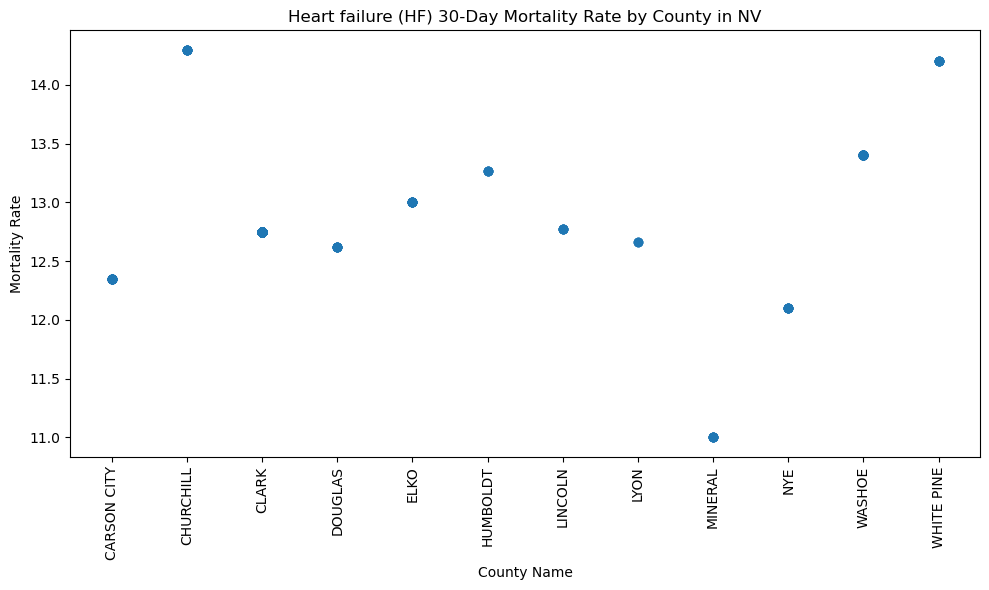

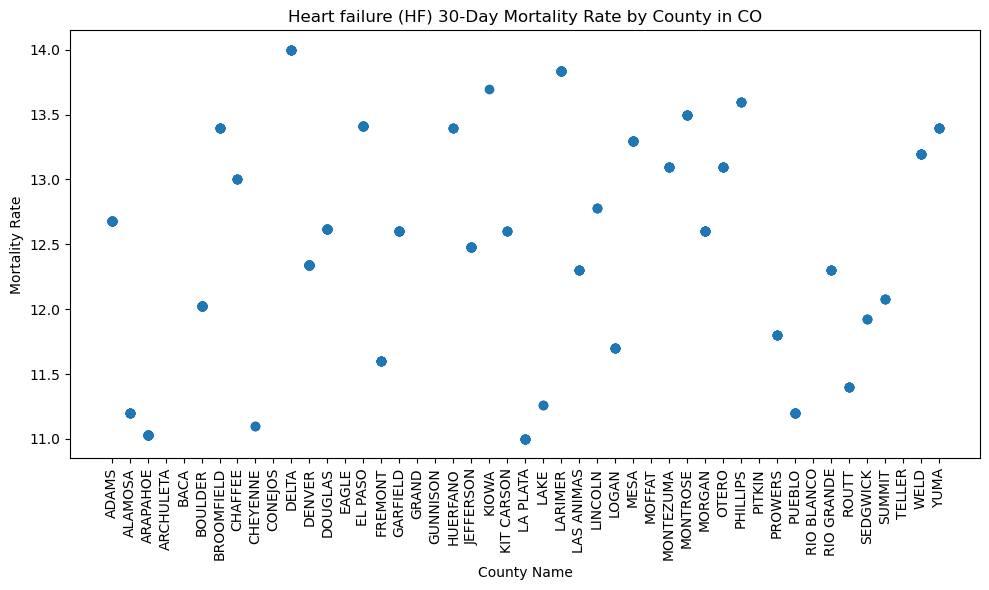

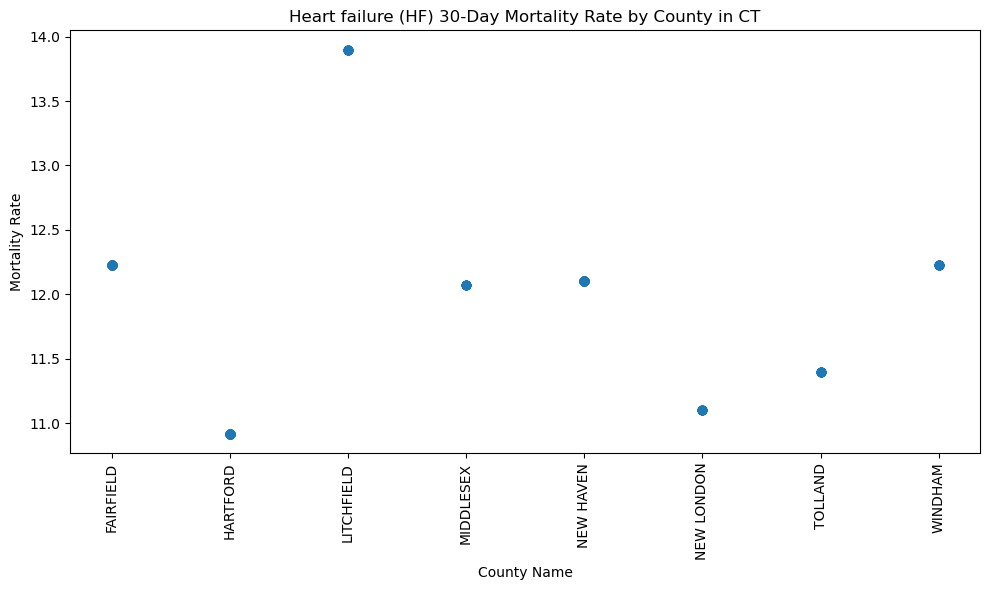

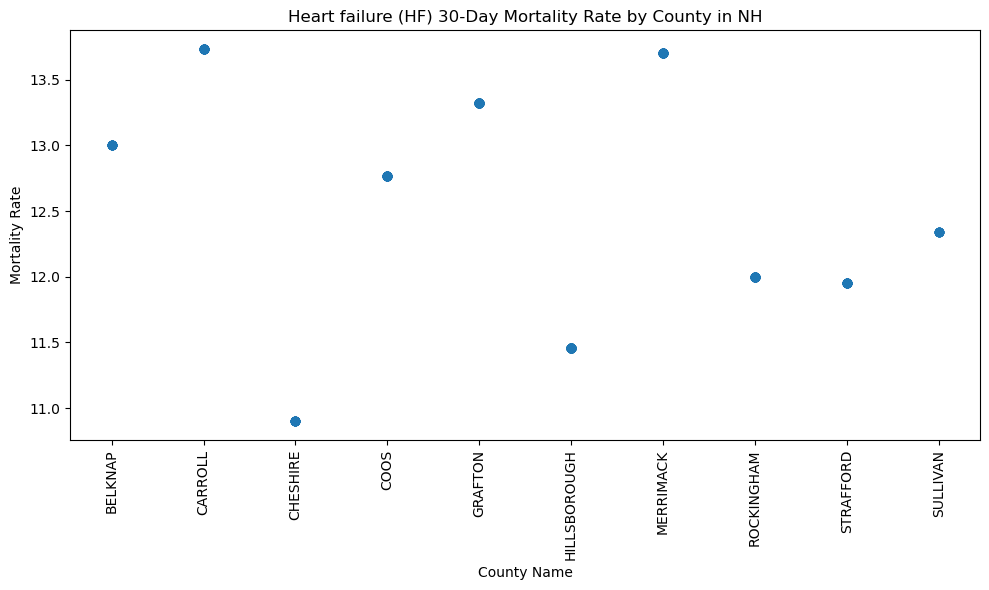

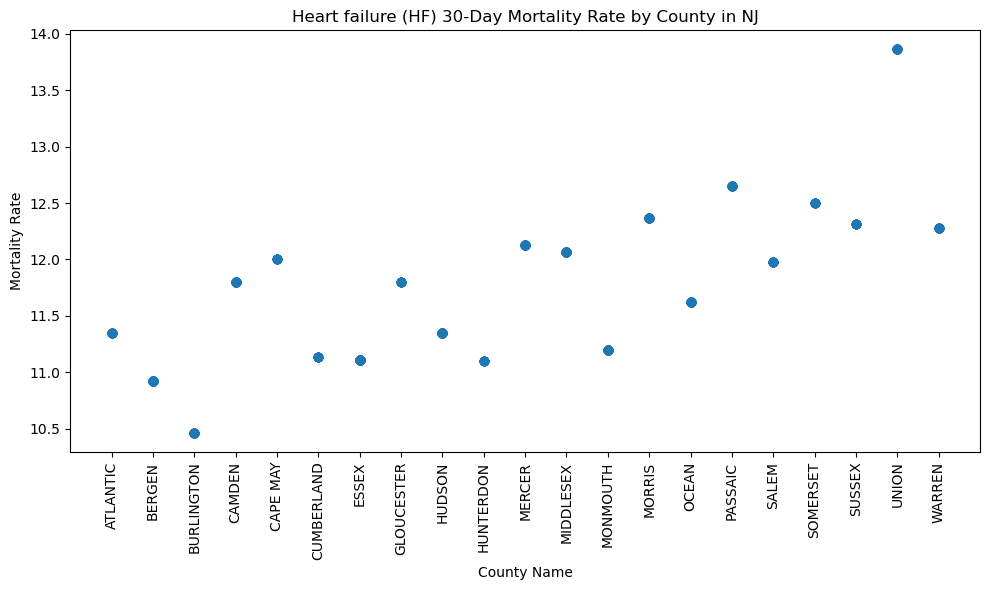

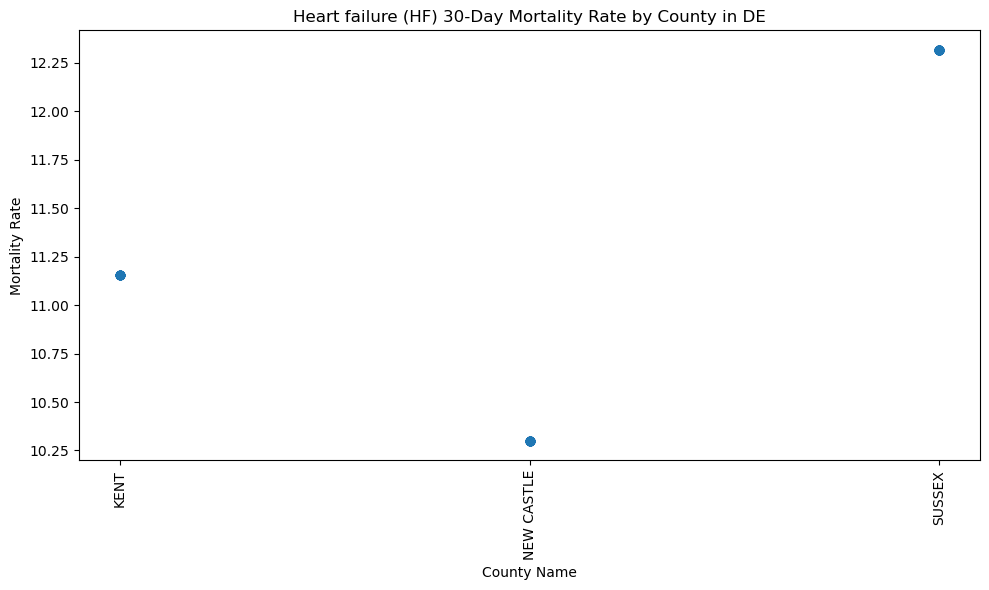

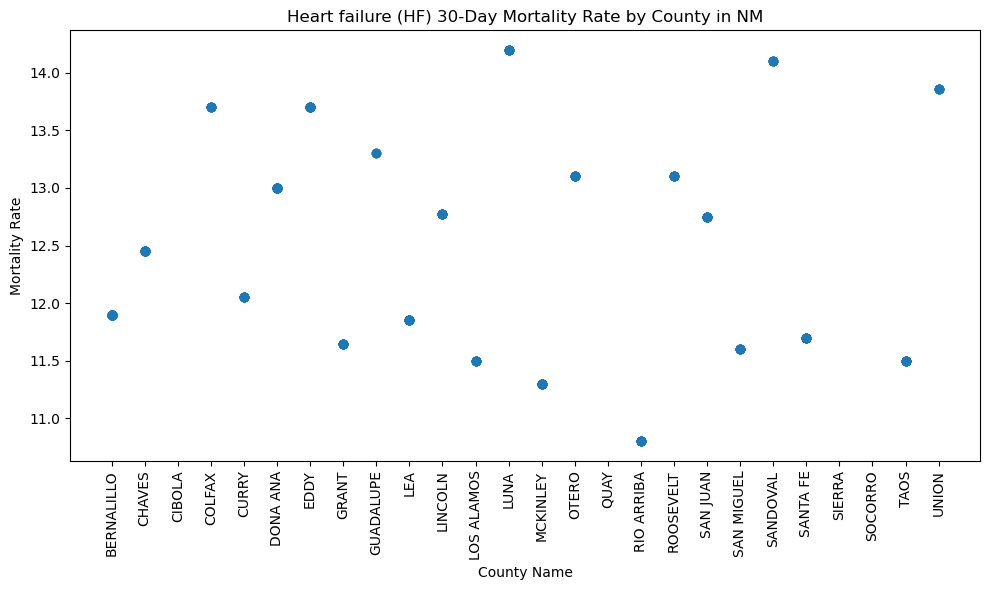

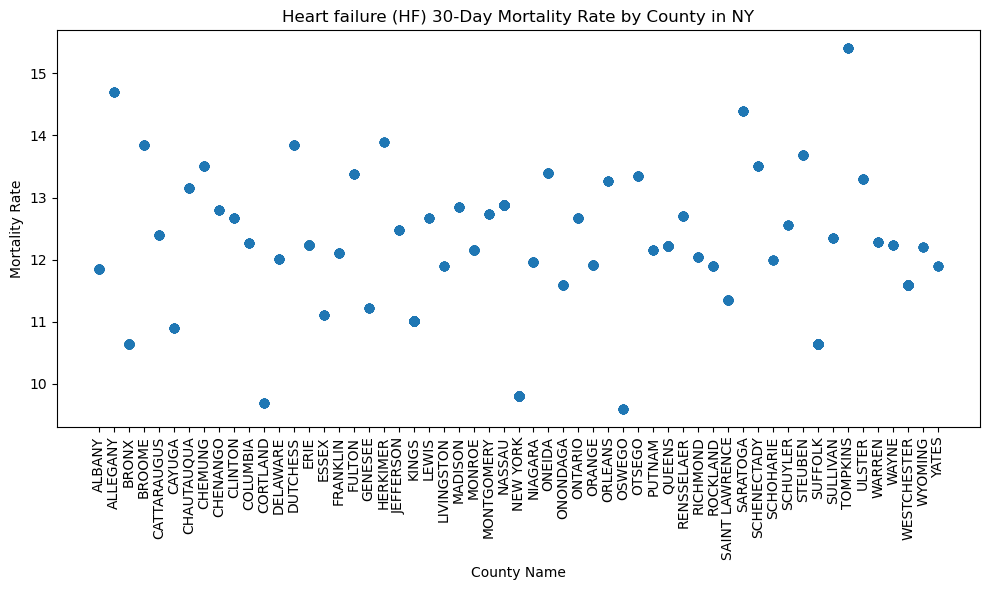

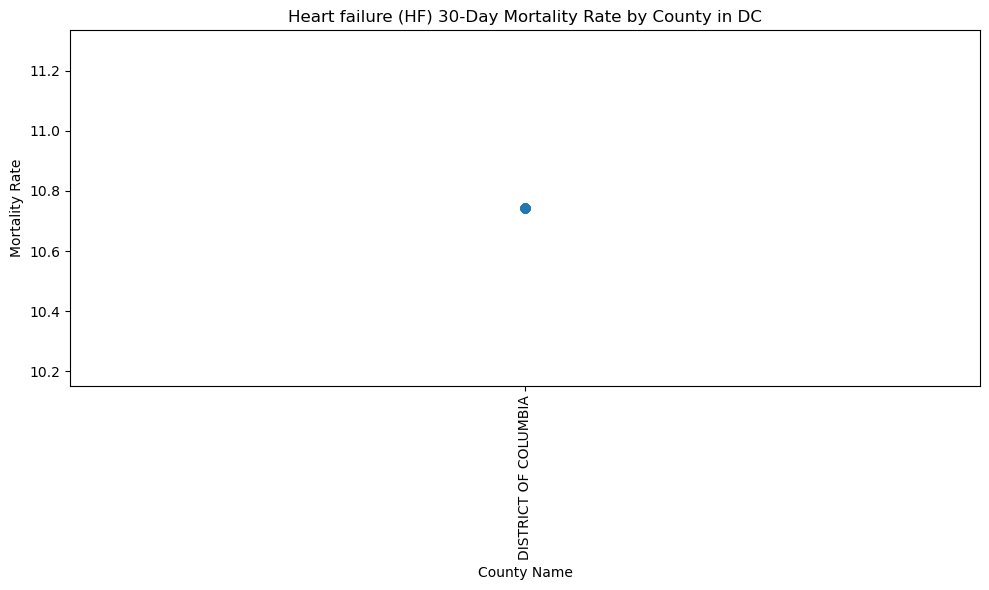

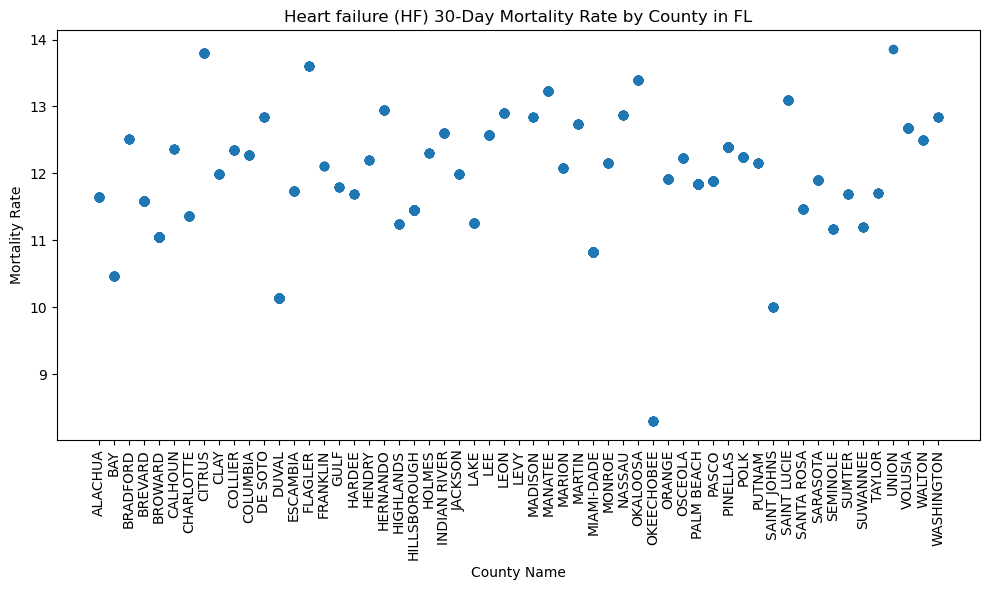

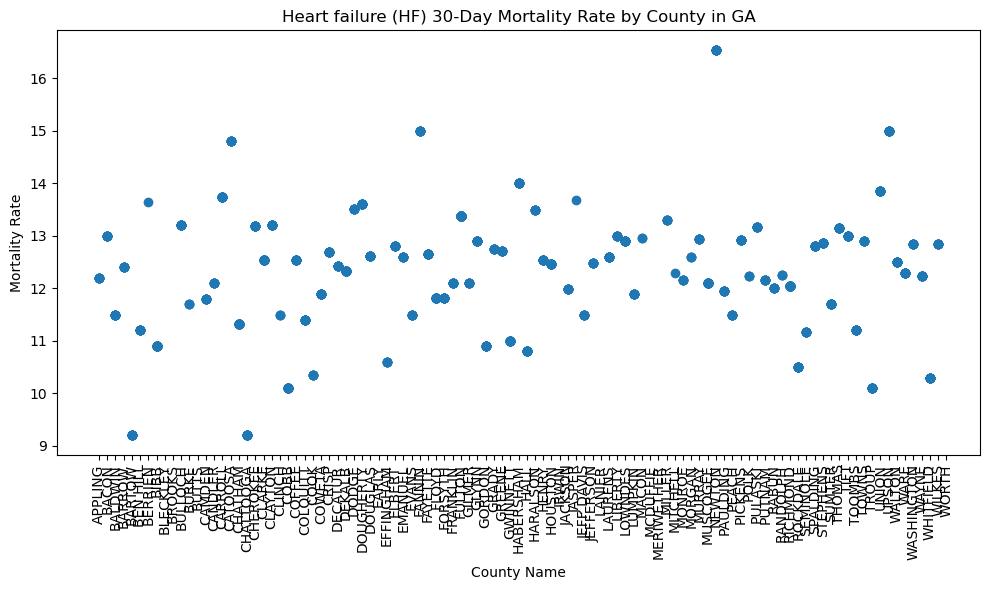

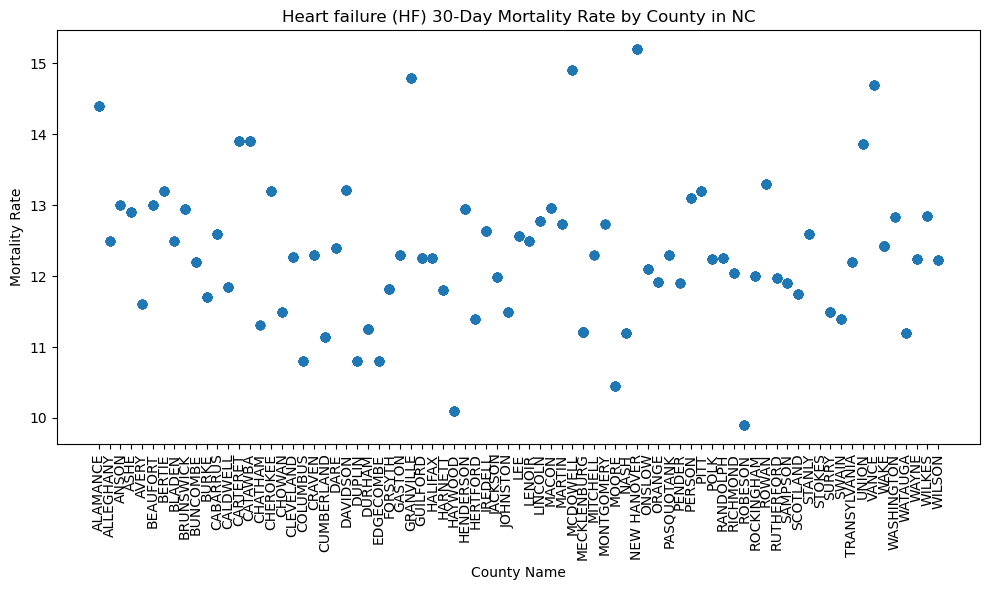

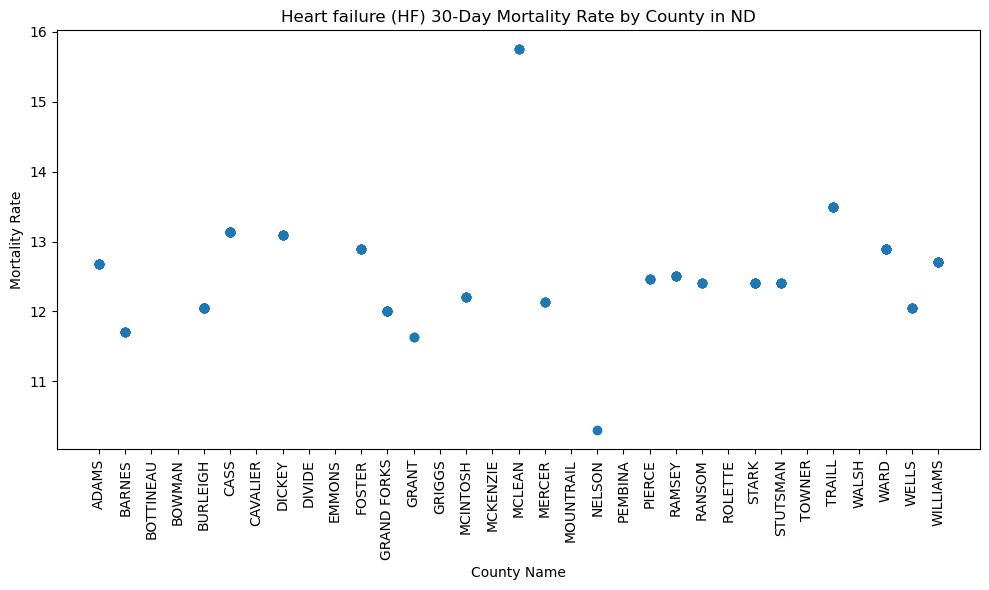

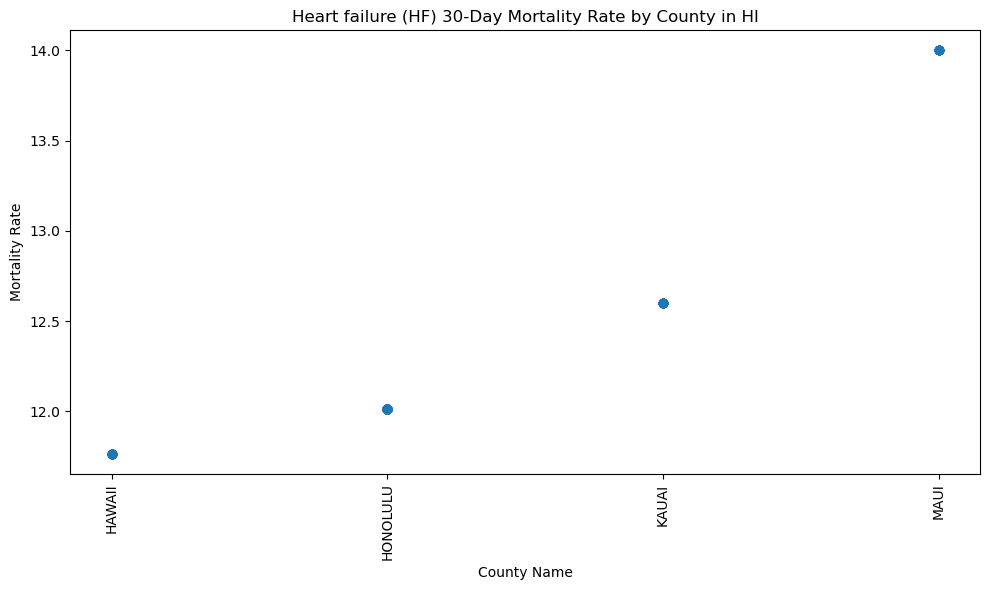

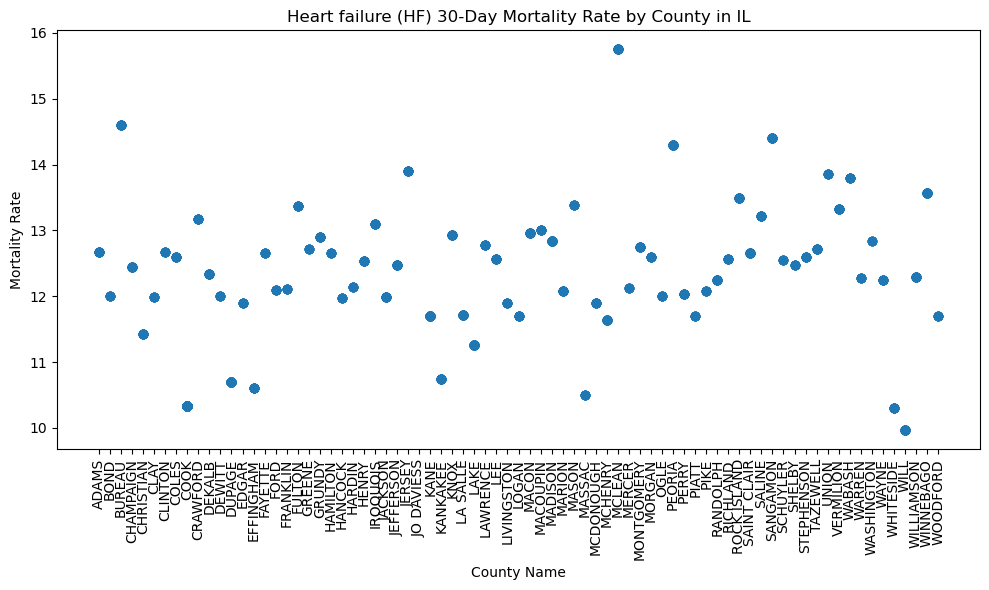

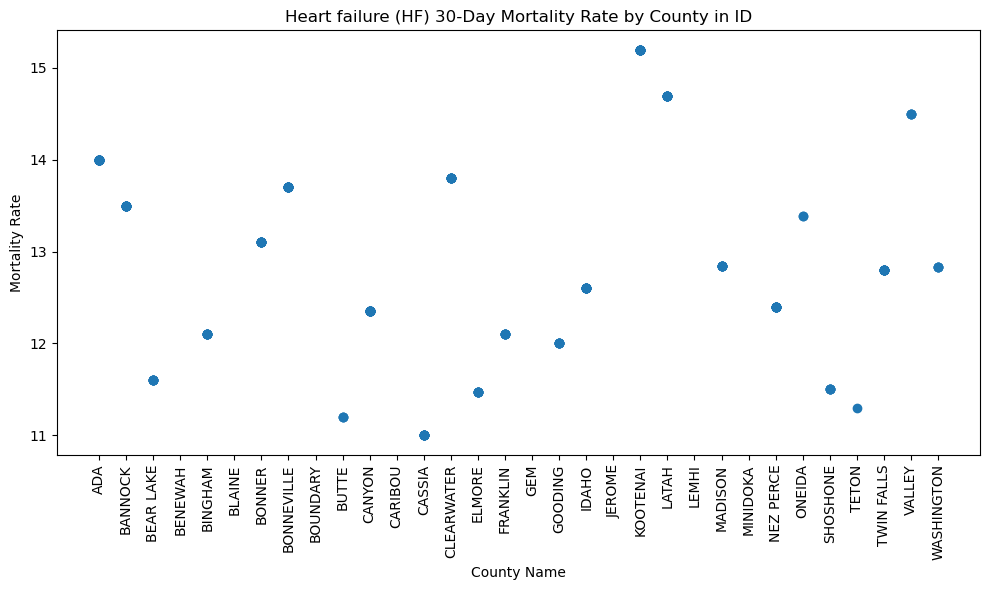

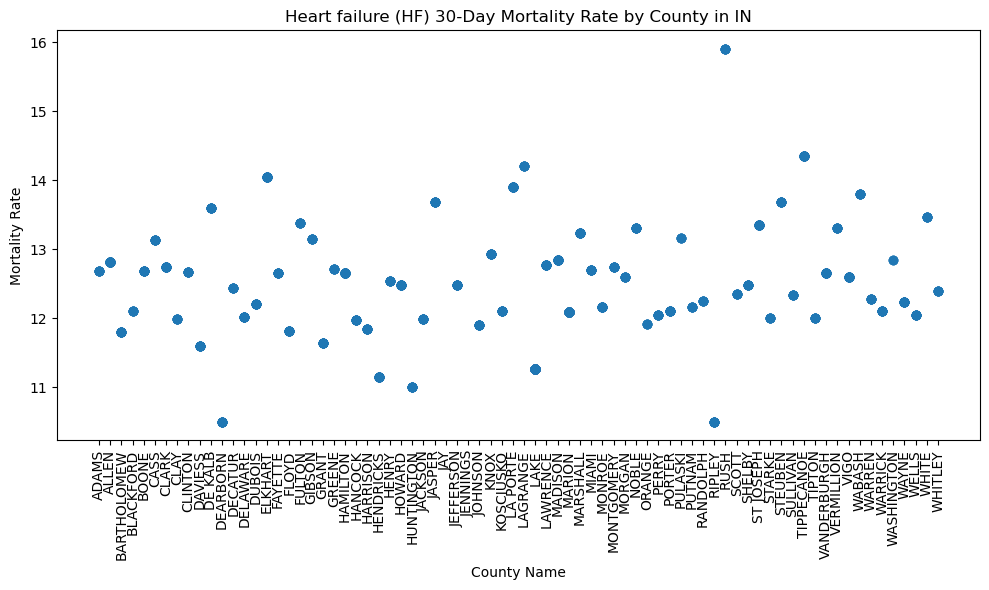

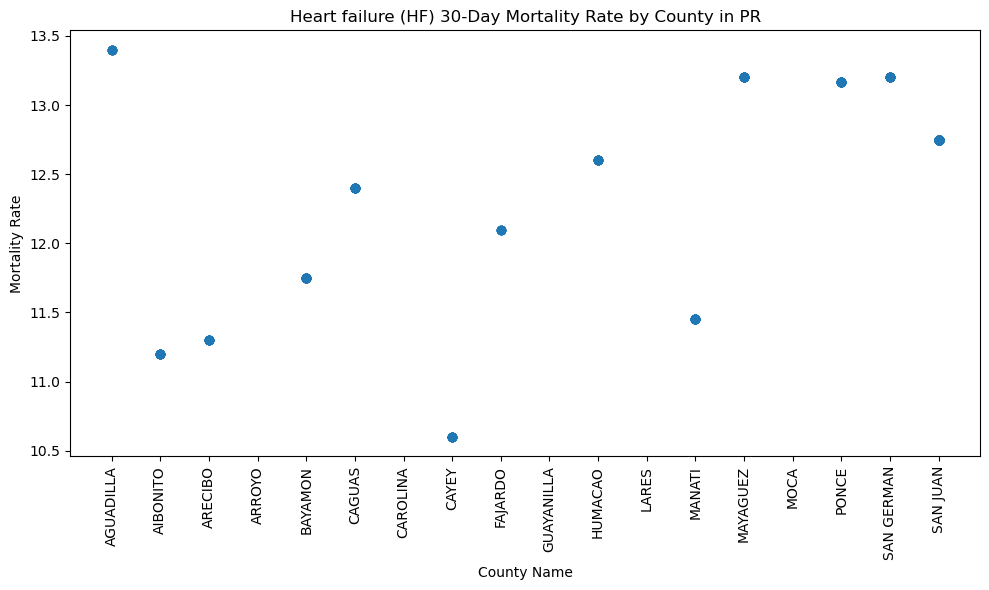

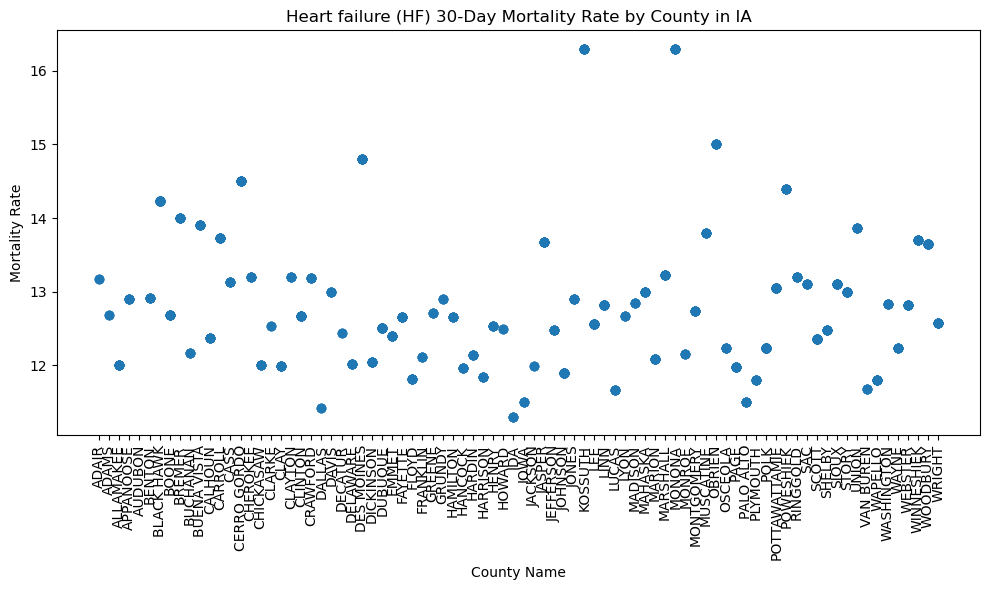

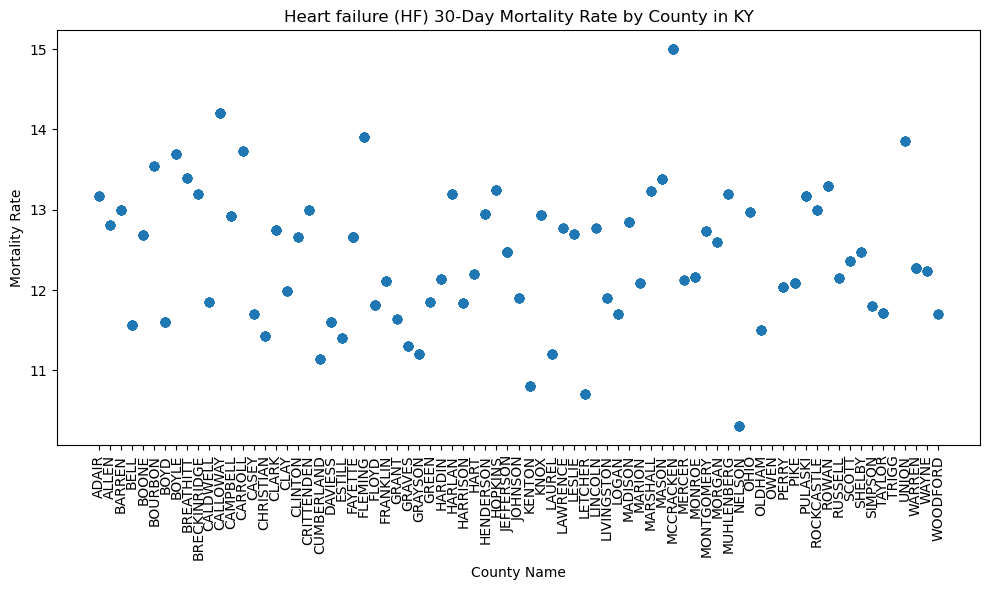

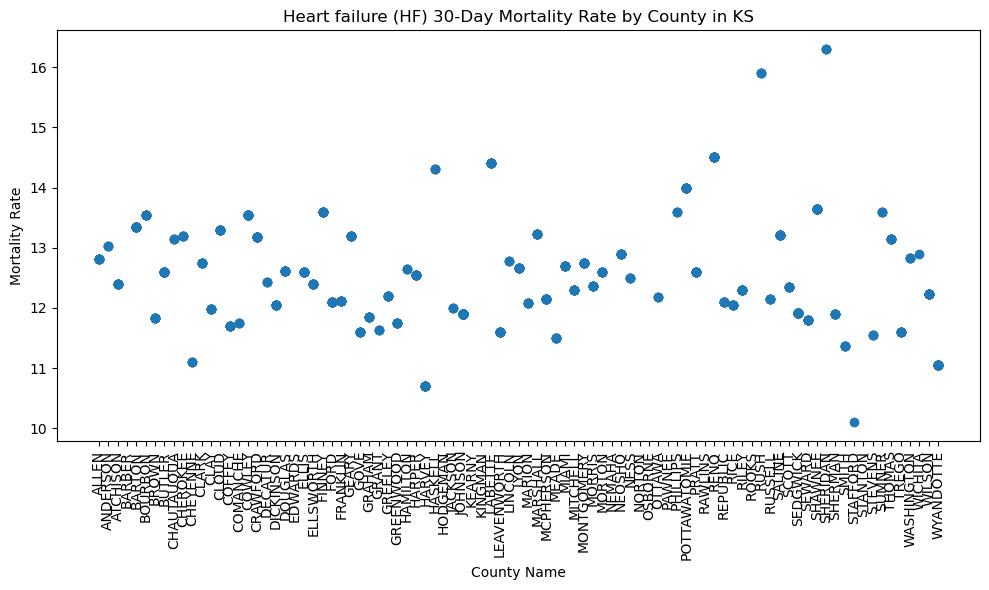

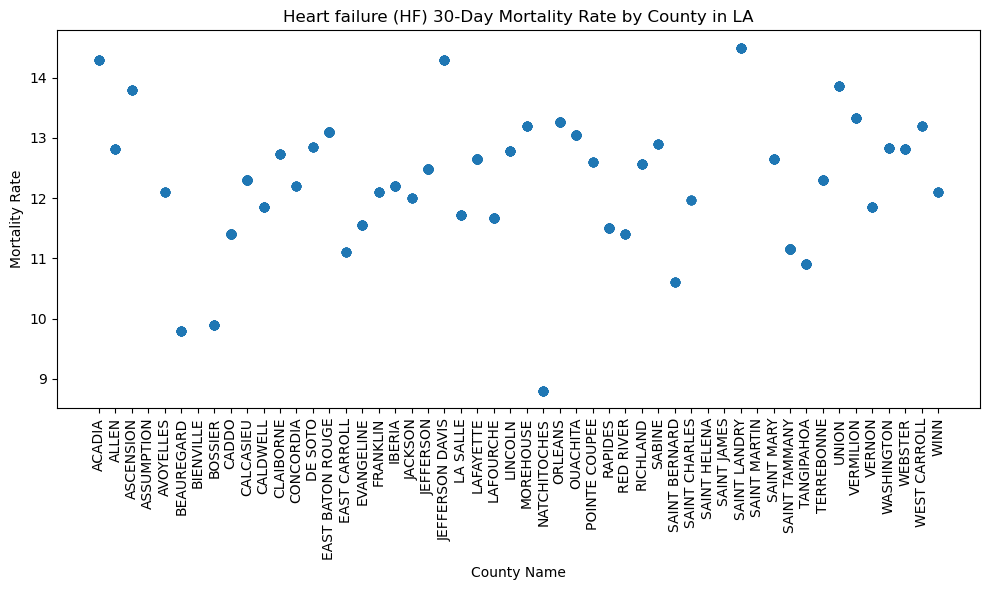

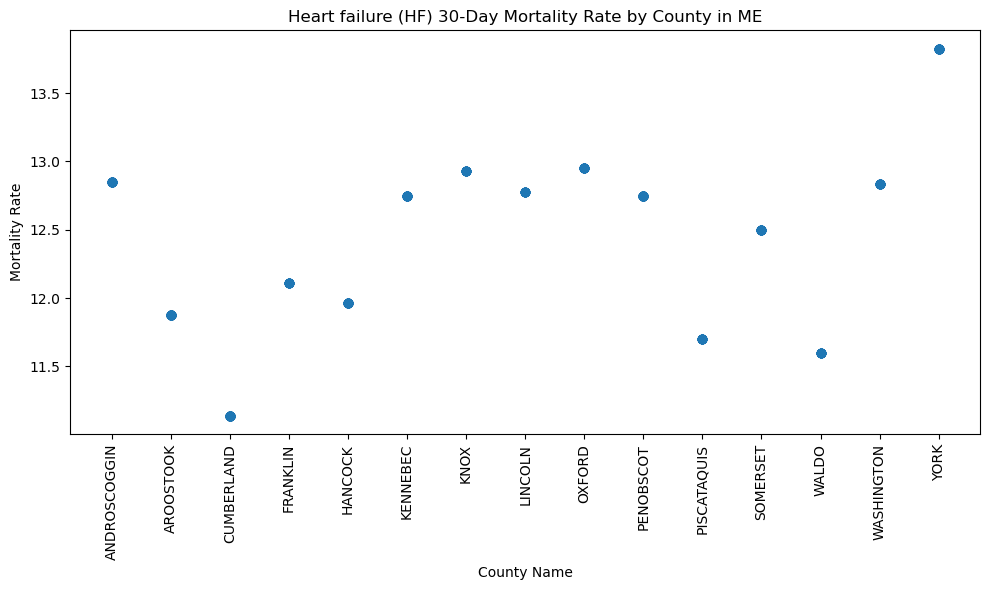

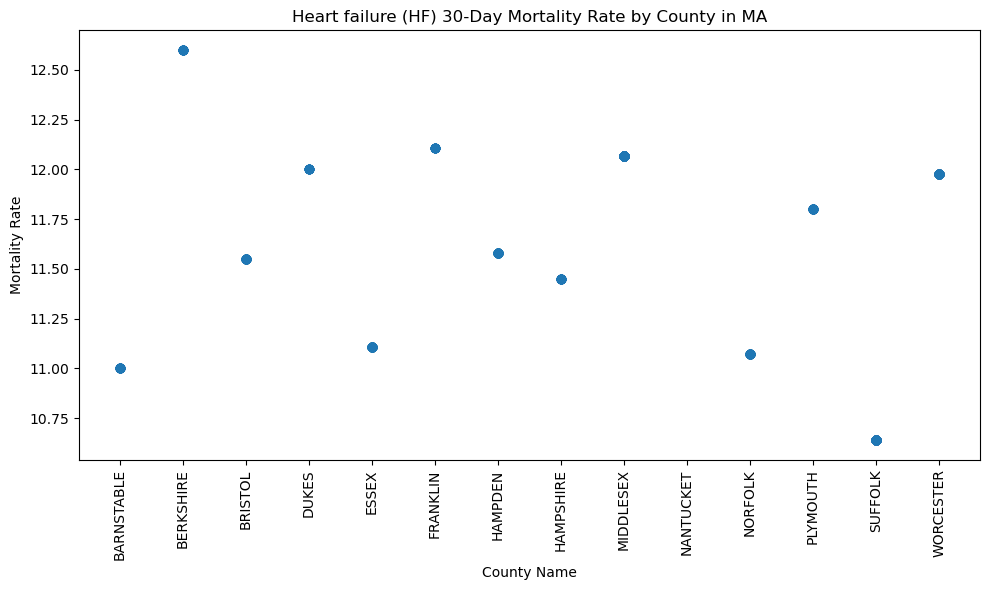

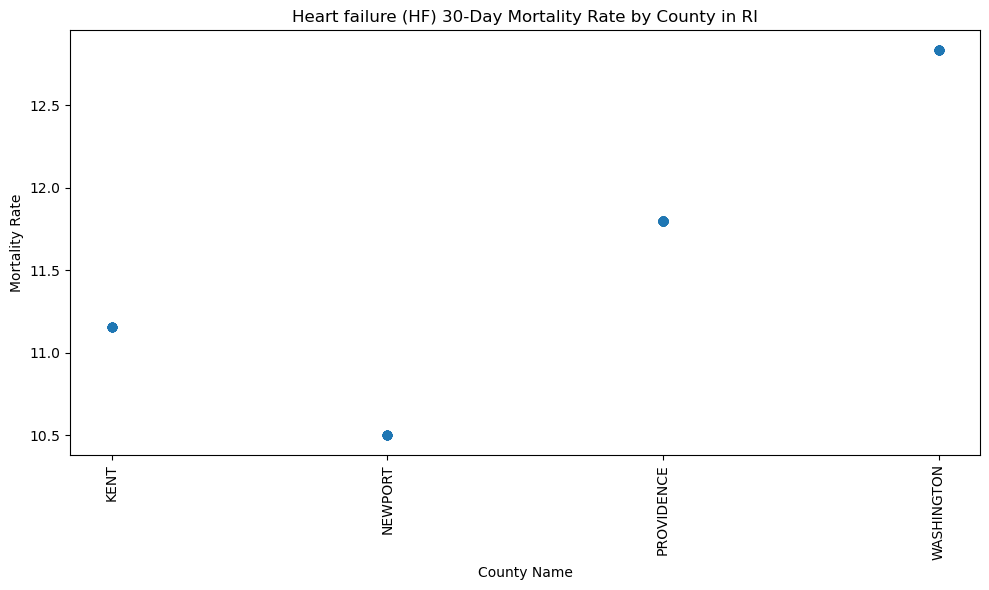

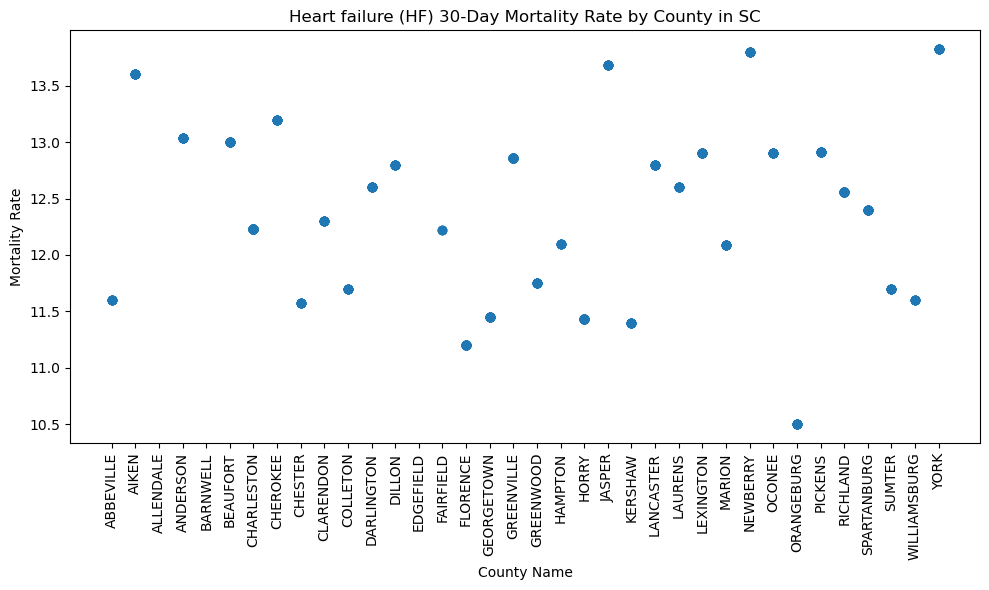

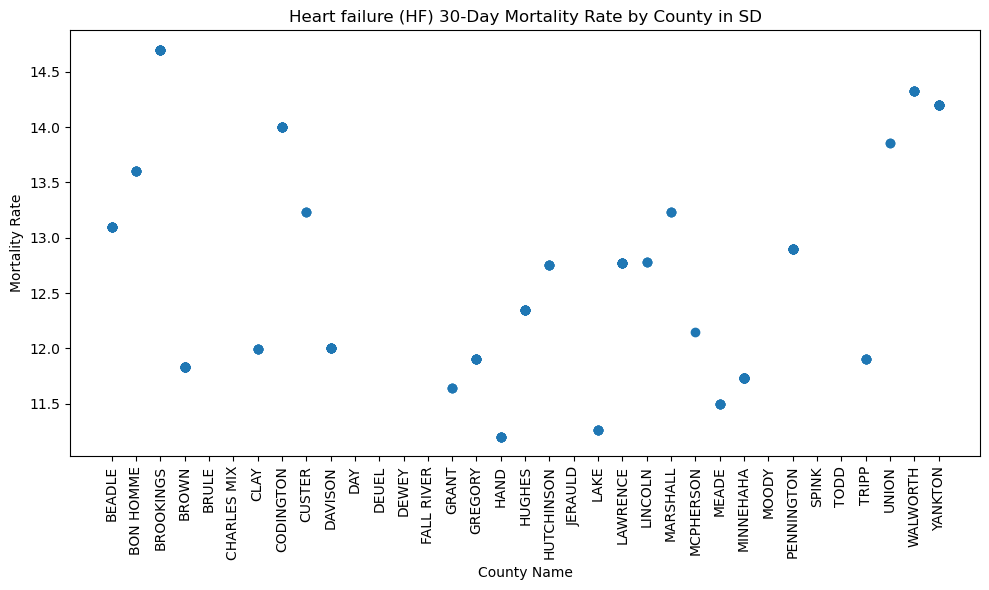

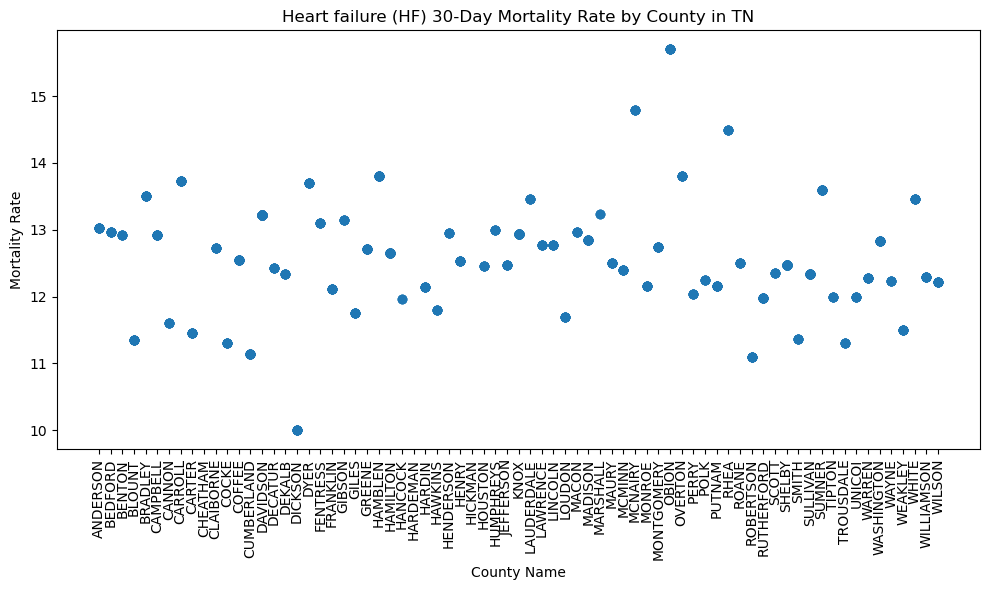

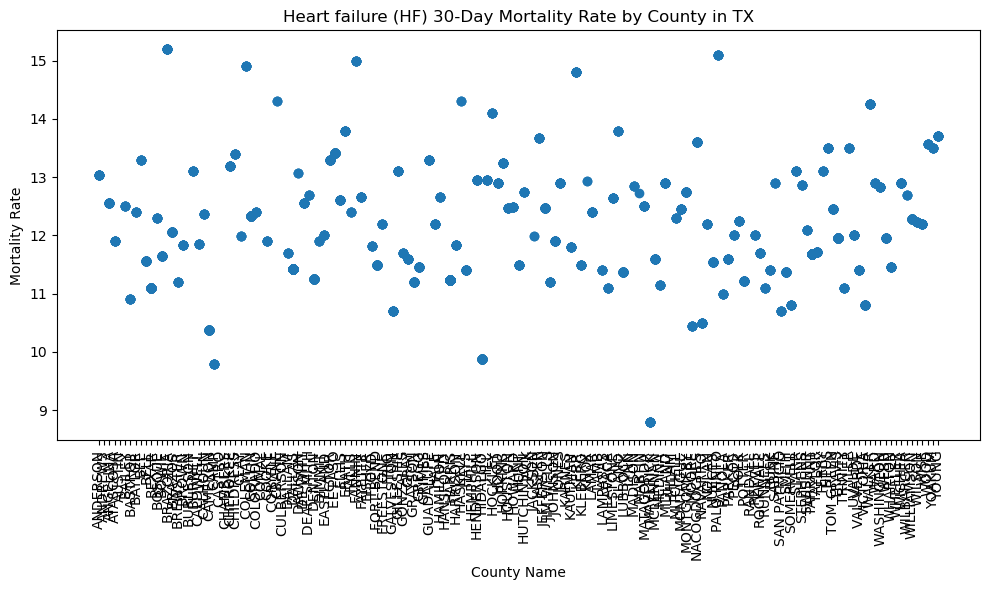

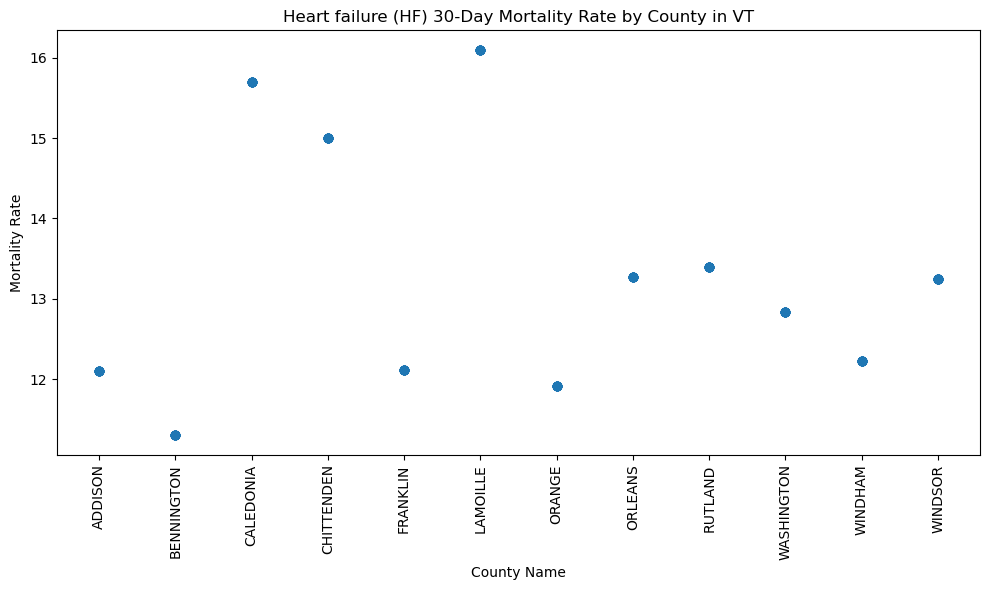

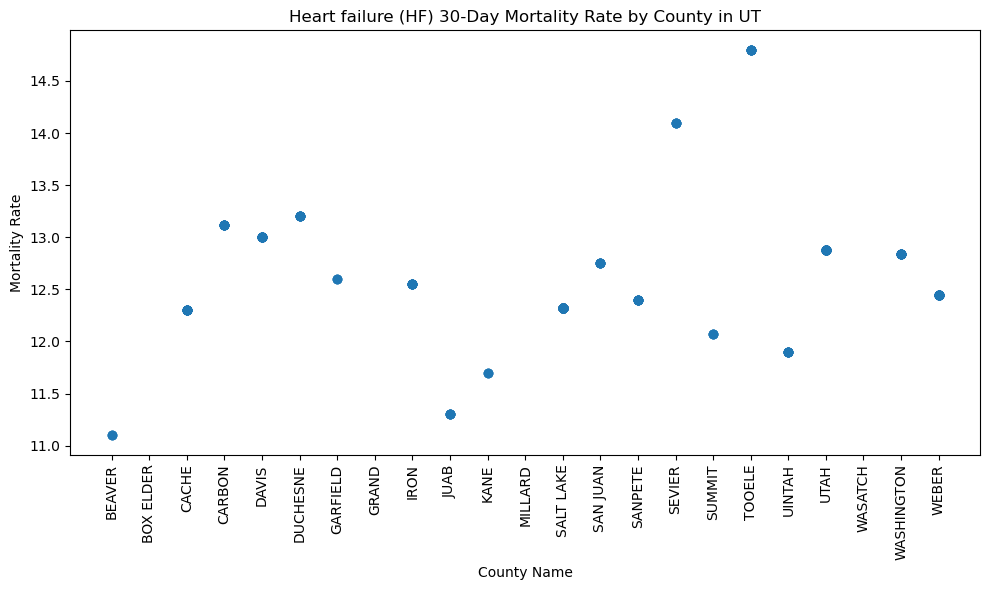

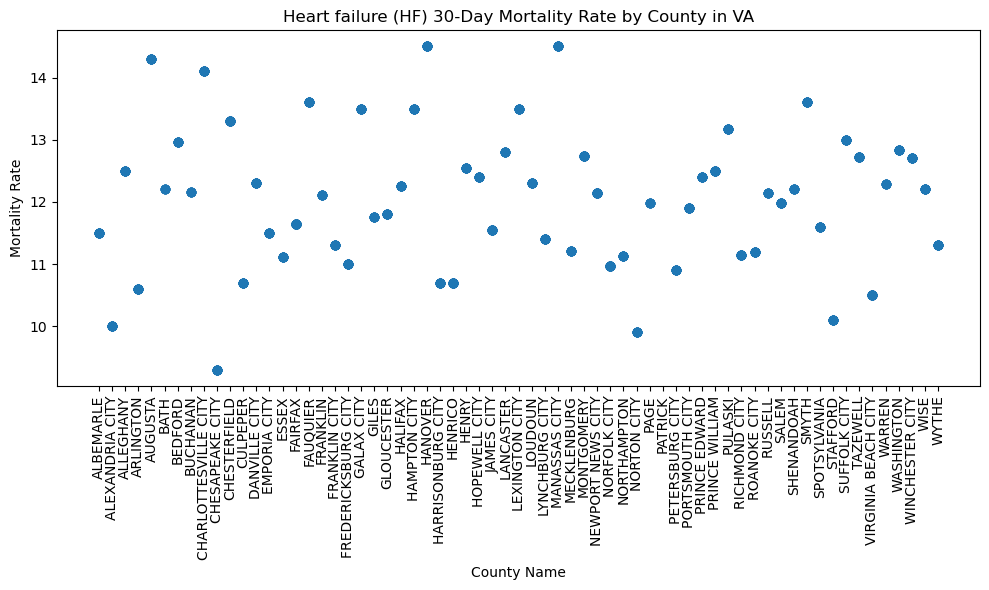

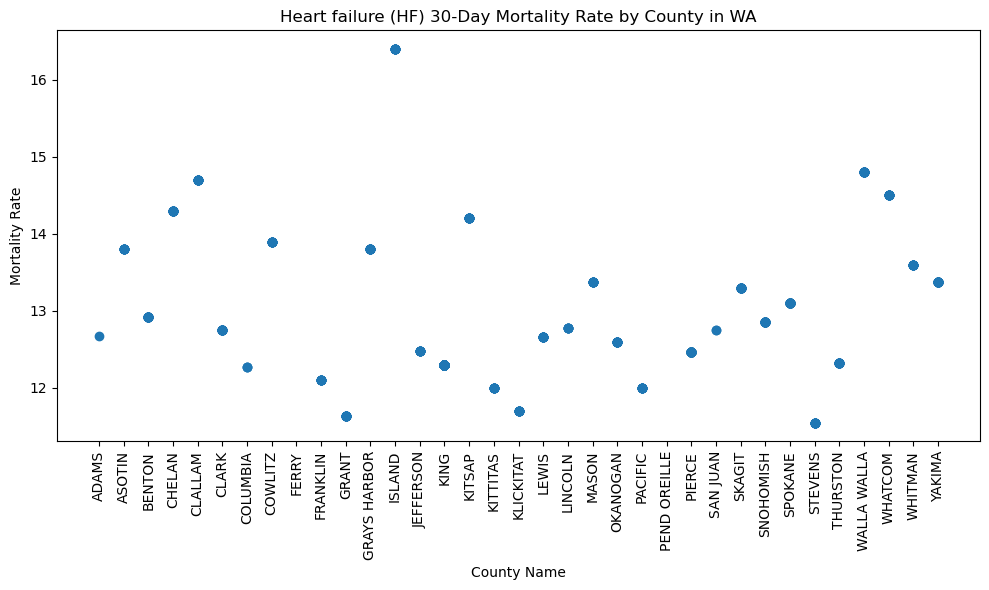

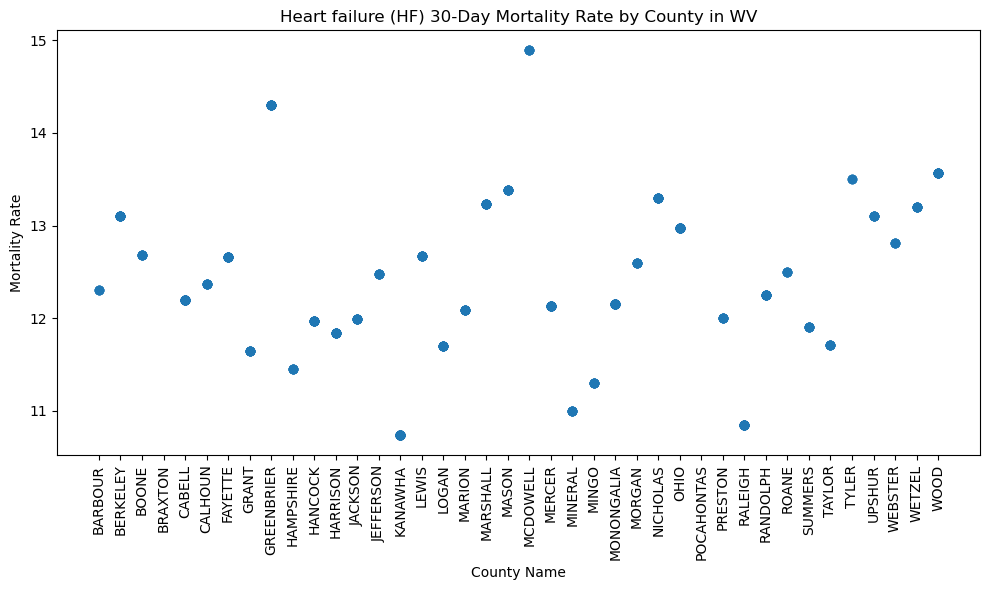

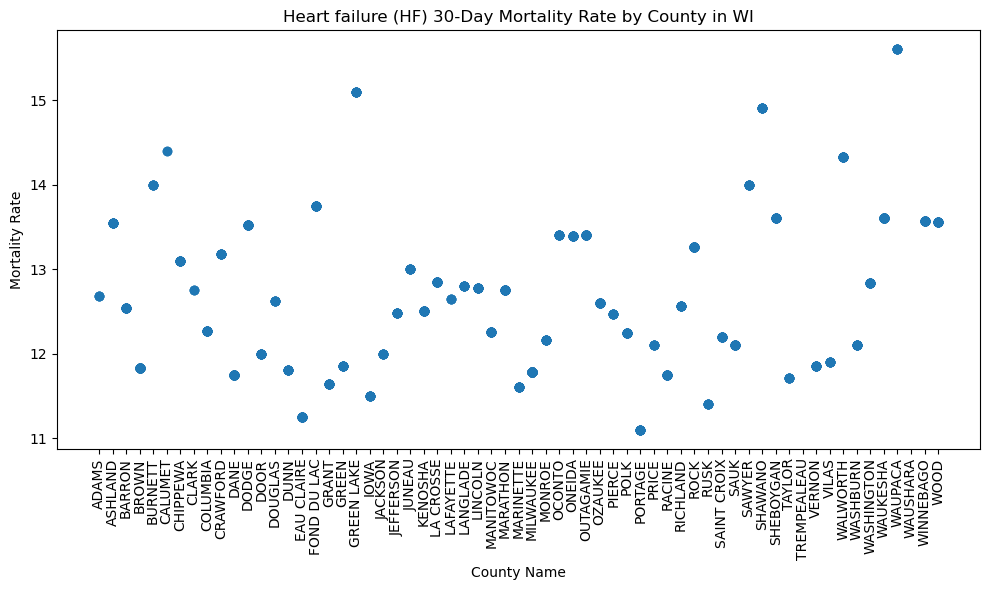

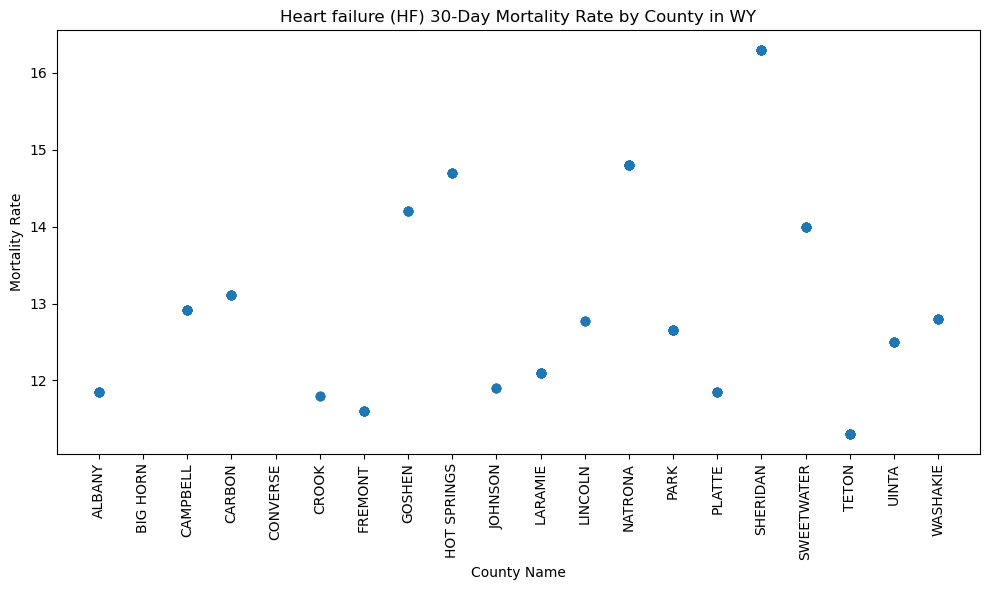

In [20]:
unique_states = hospital_data['State'].unique()

for state in unique_states:
    # Filter data for the current state
    state_data = heart_disease[heart_disease['State'] == state]
    
    # Create scatterplot
    plt.figure(figsize=(10, 6))
    plt.scatter(state_data['County Name'], state_data['Heart failure (HF) 30-Day Mortality Rate'])
    
    # Formatting the plot
    plt.title(f"Heart failure (HF) 30-Day Mortality Rate by County in {state}")
    plt.xlabel('County Name')
    plt.ylabel('Mortality Rate')
    plt.xticks(rotation=90)  # Rotate county names for better readability
    plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
    
    # Show/save the plot
    plt.show()

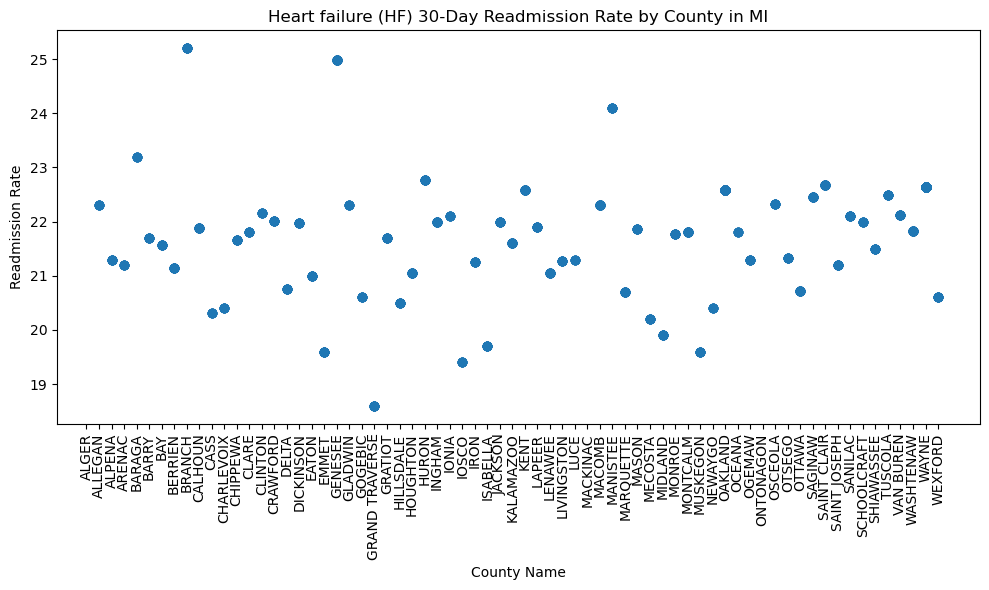

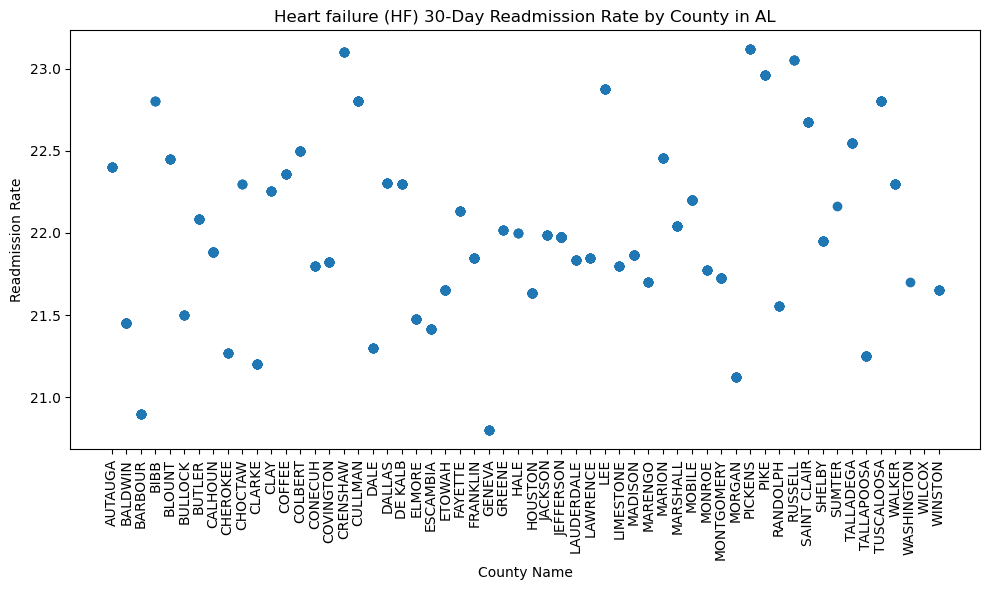

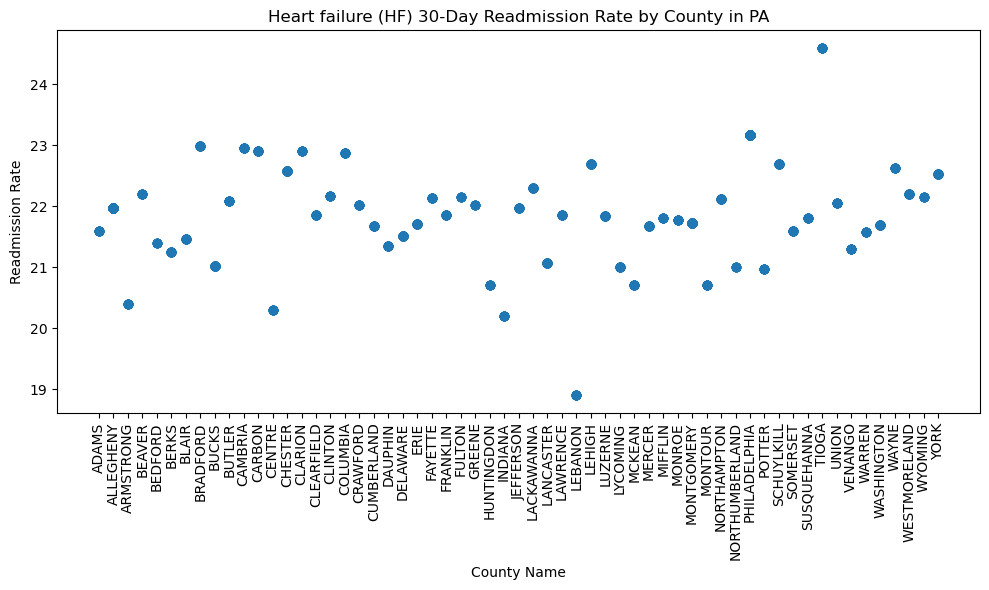

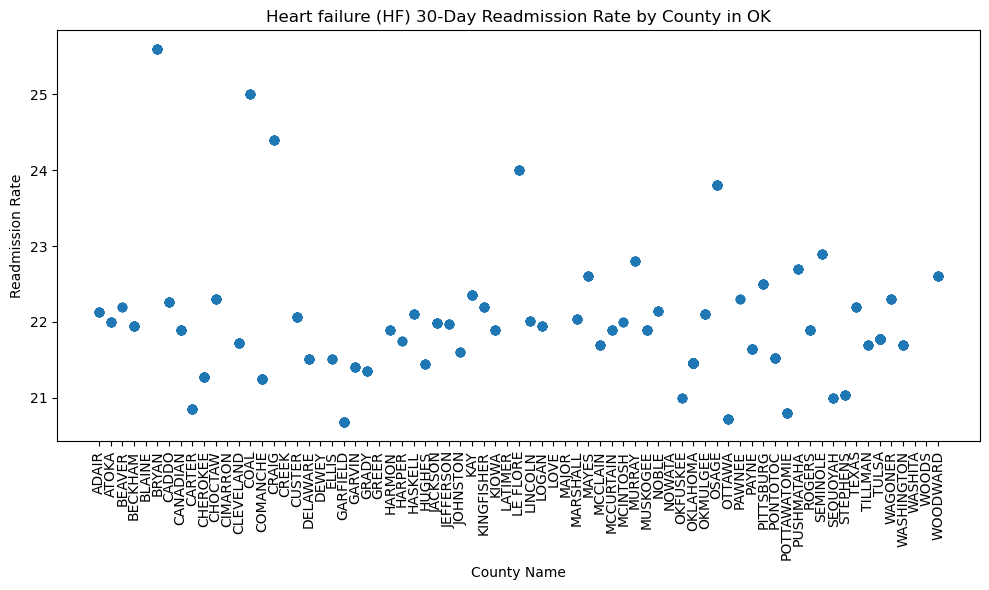

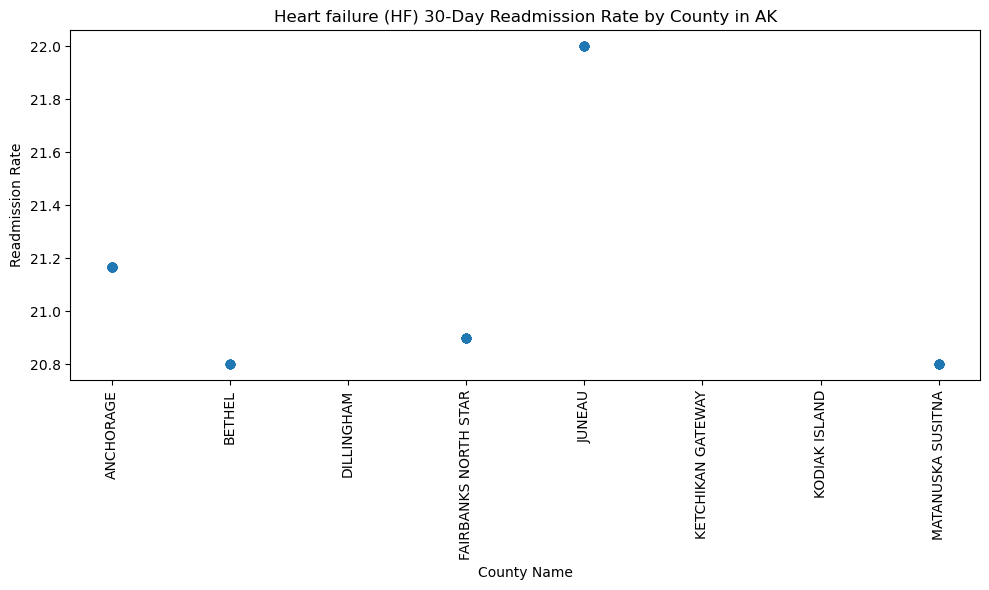

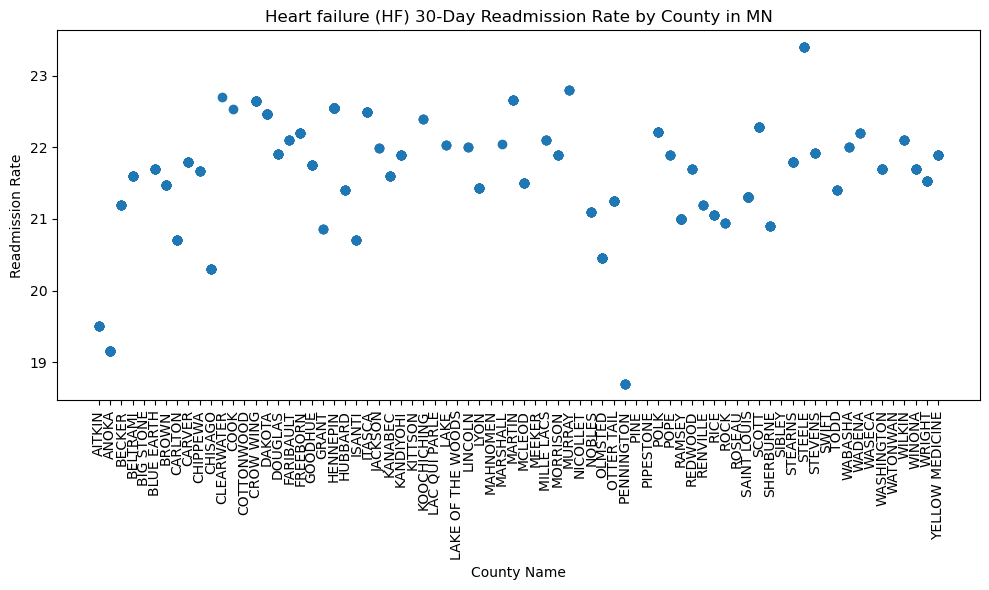

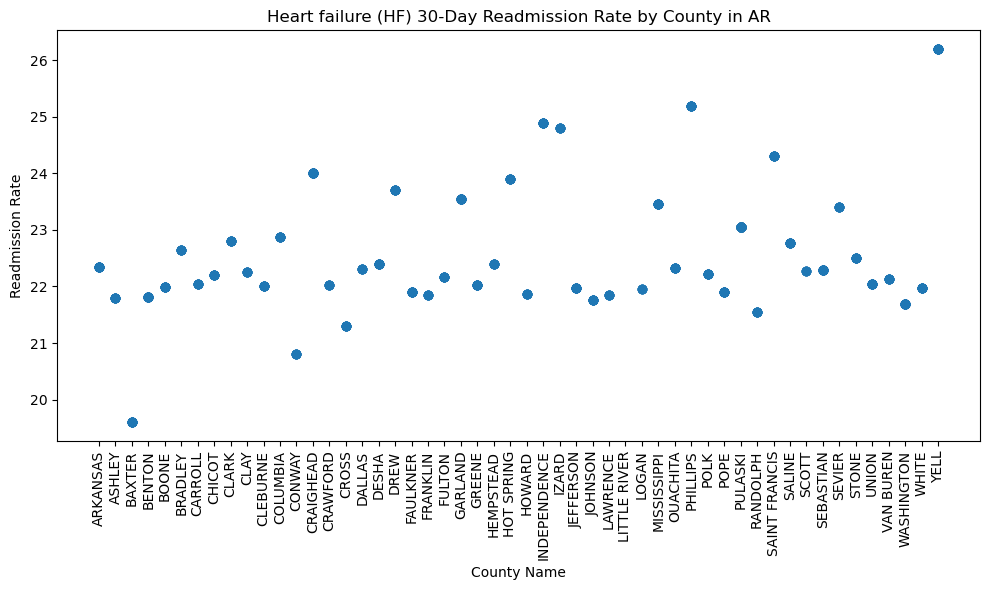

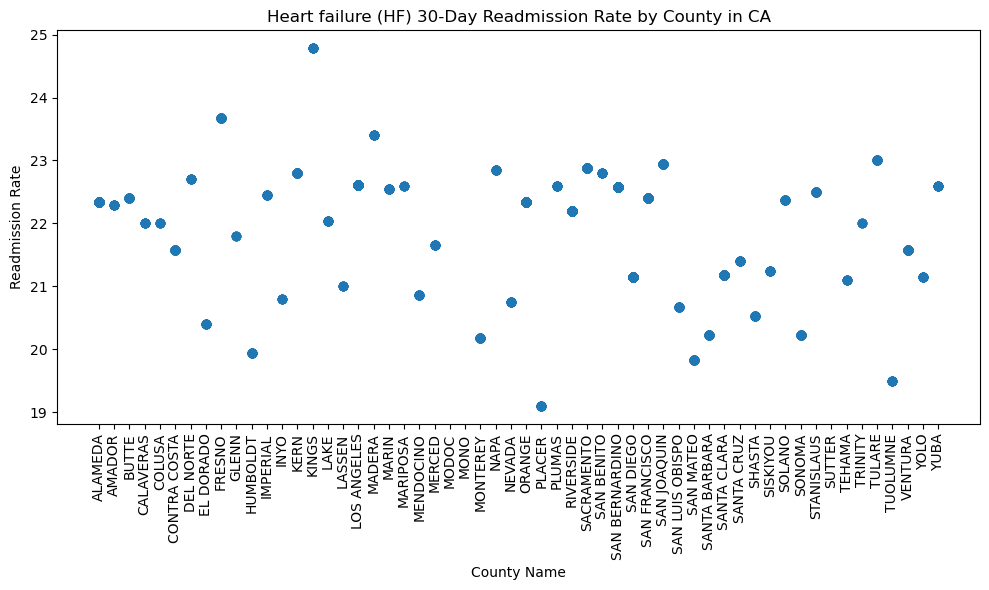

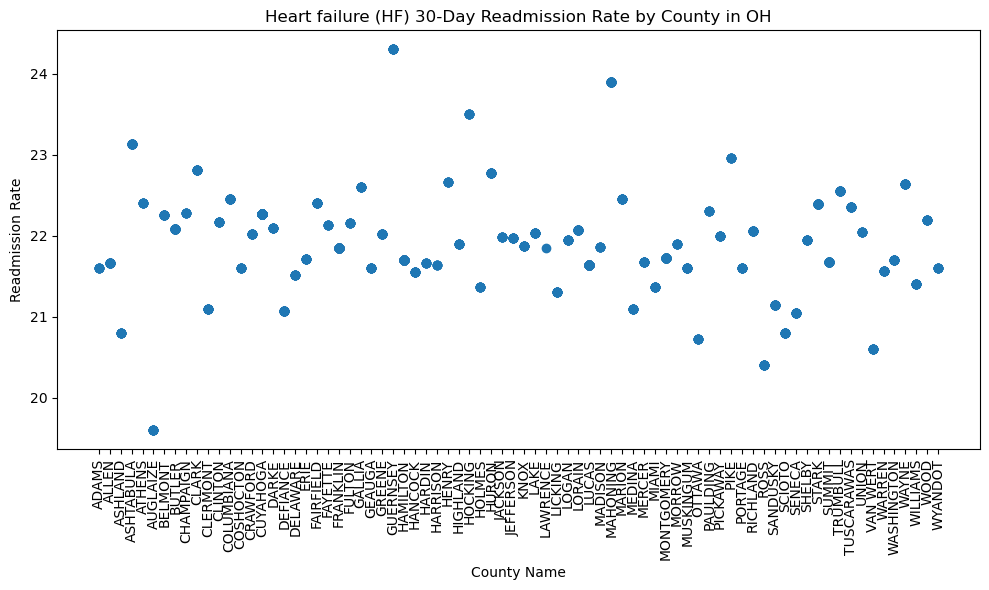

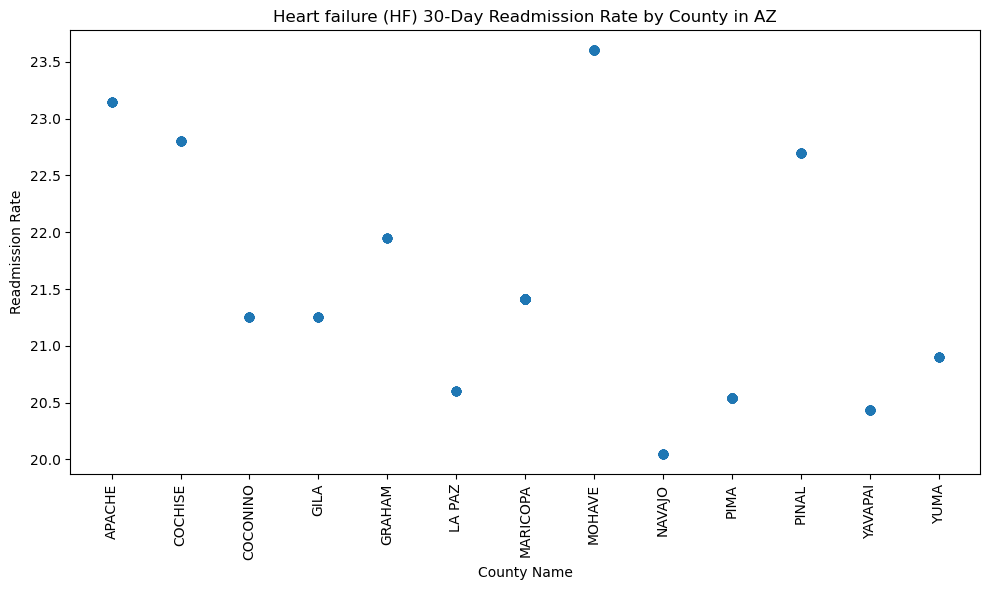

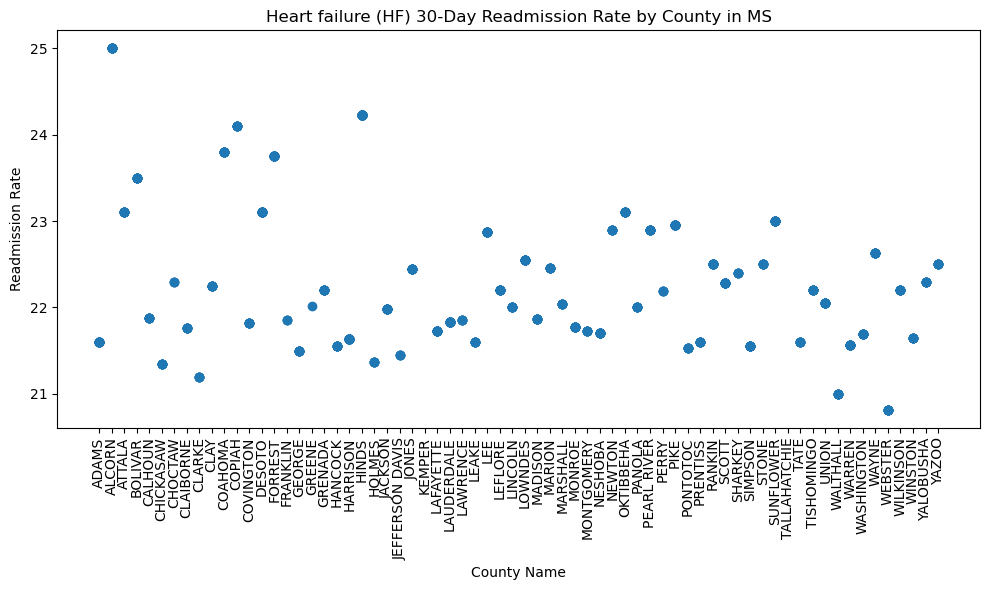

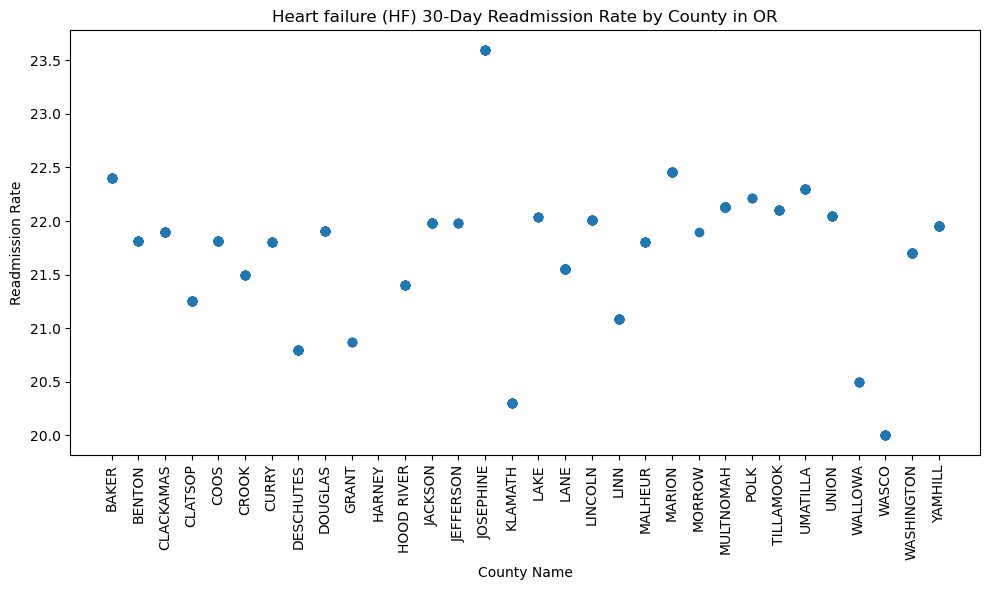

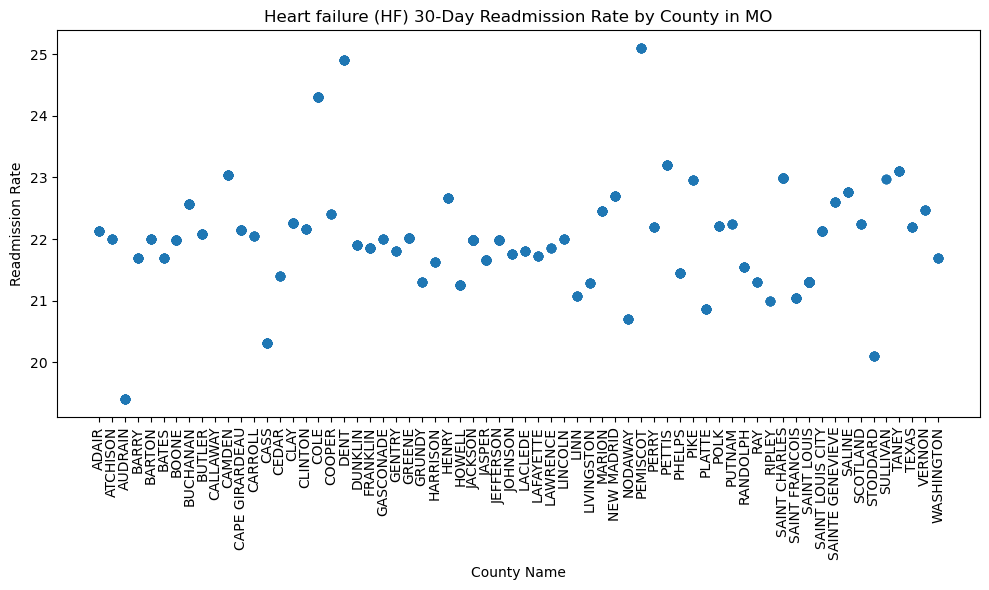

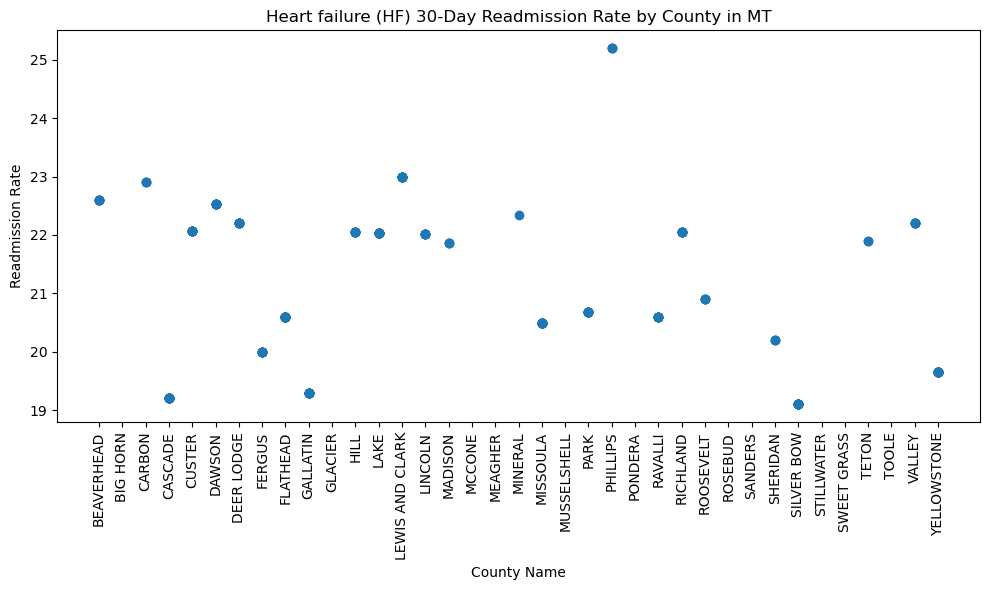

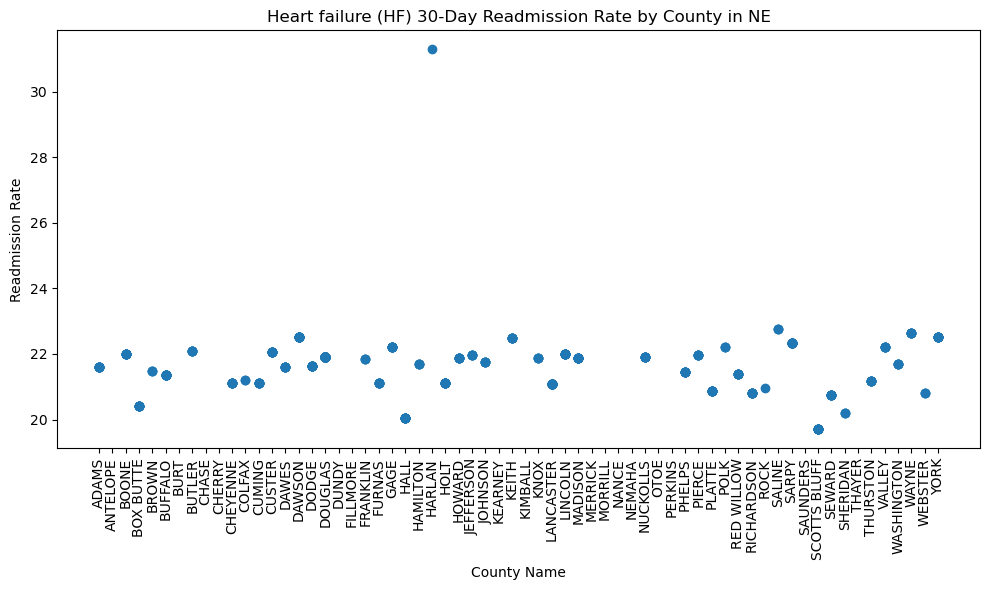

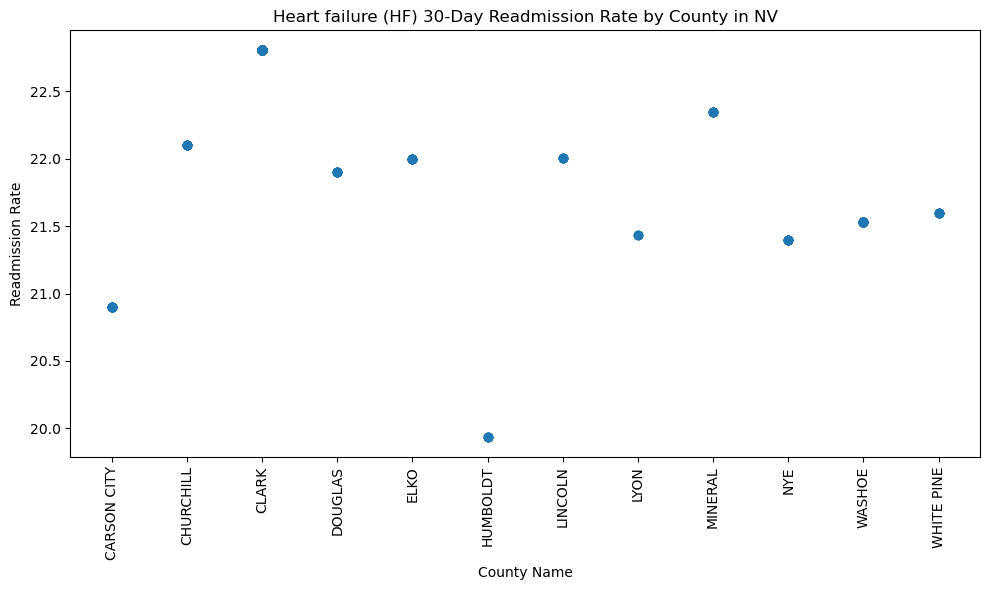

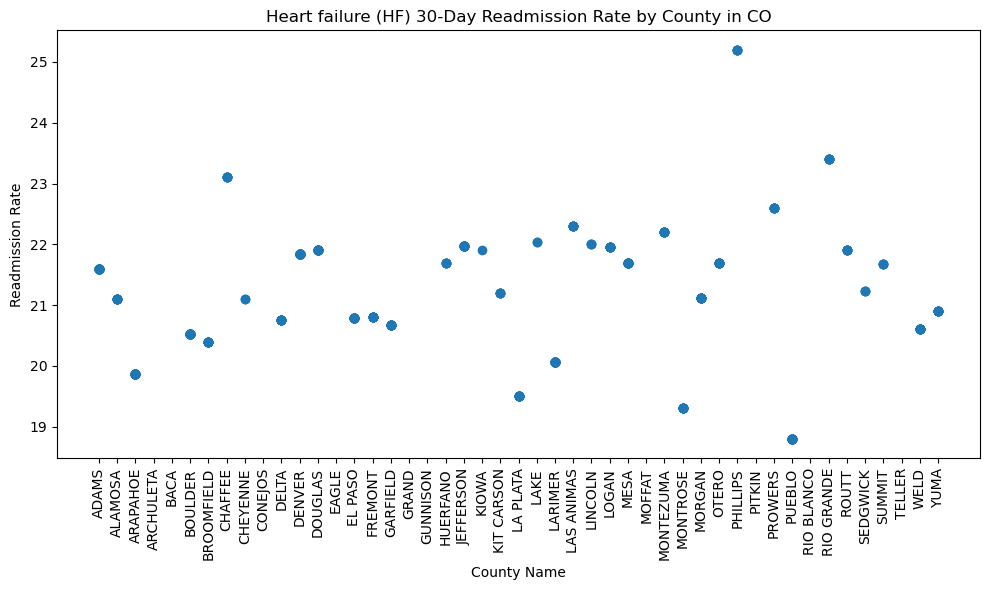

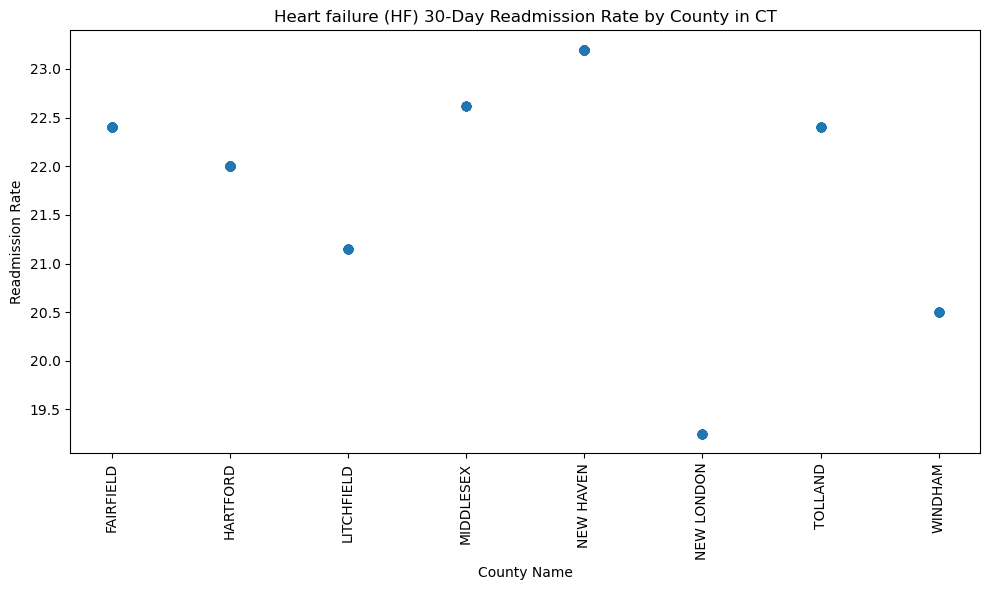

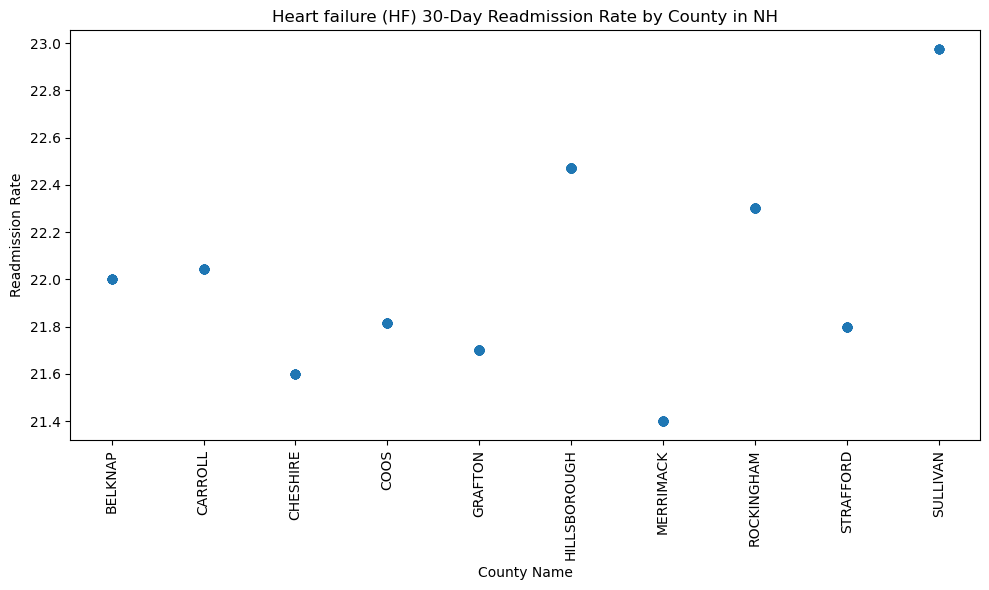

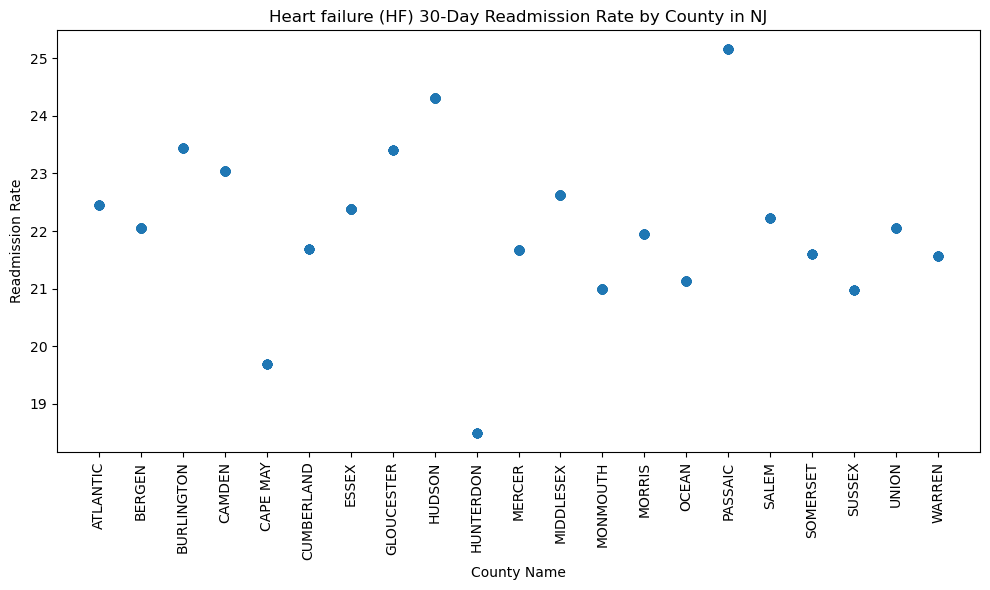

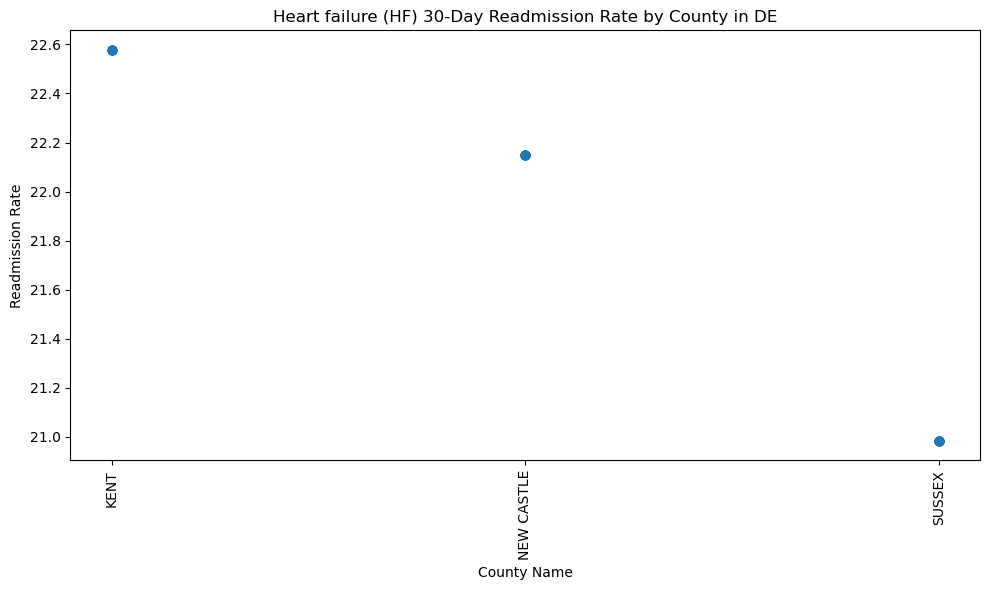

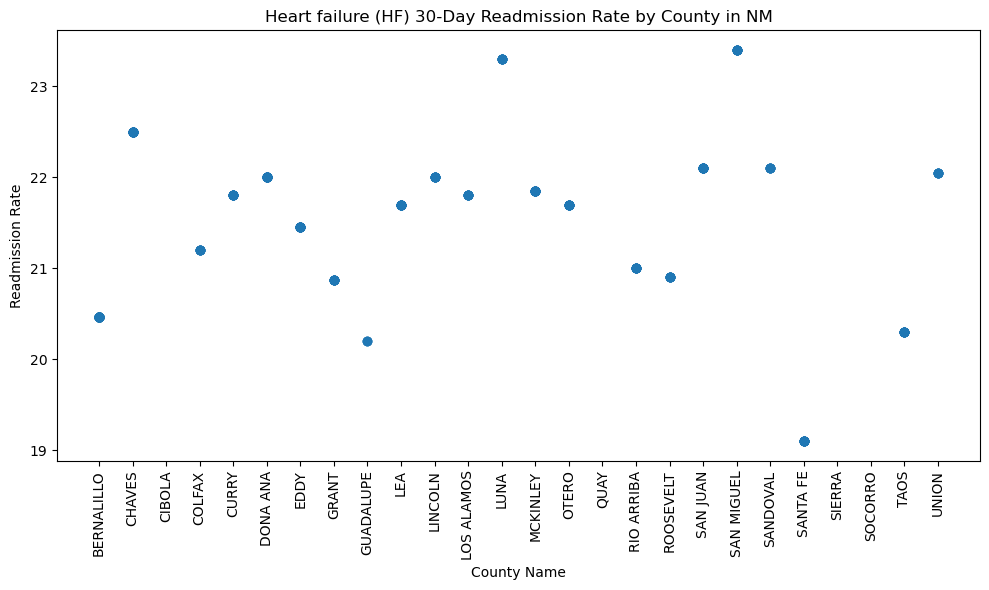

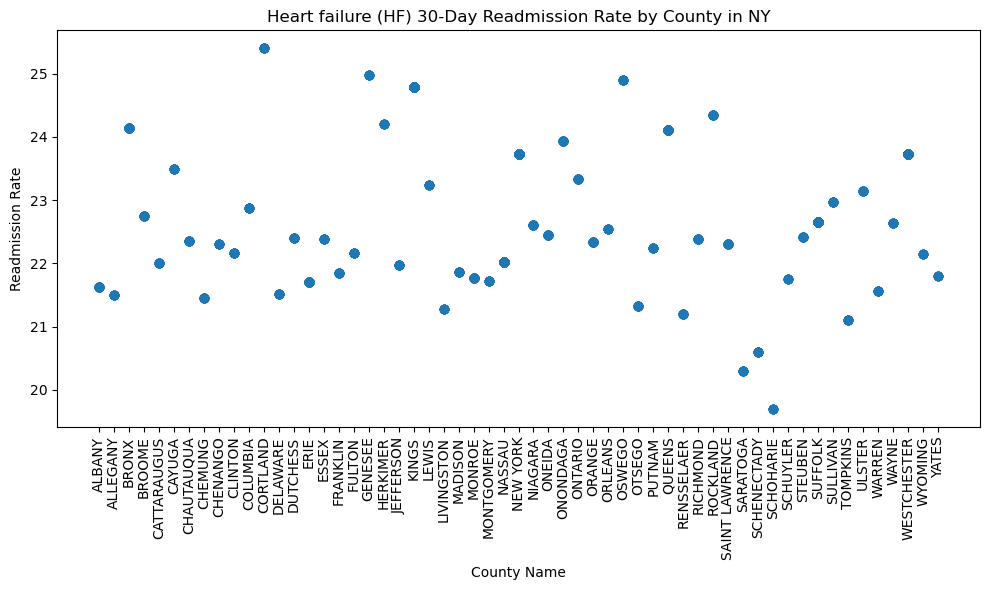

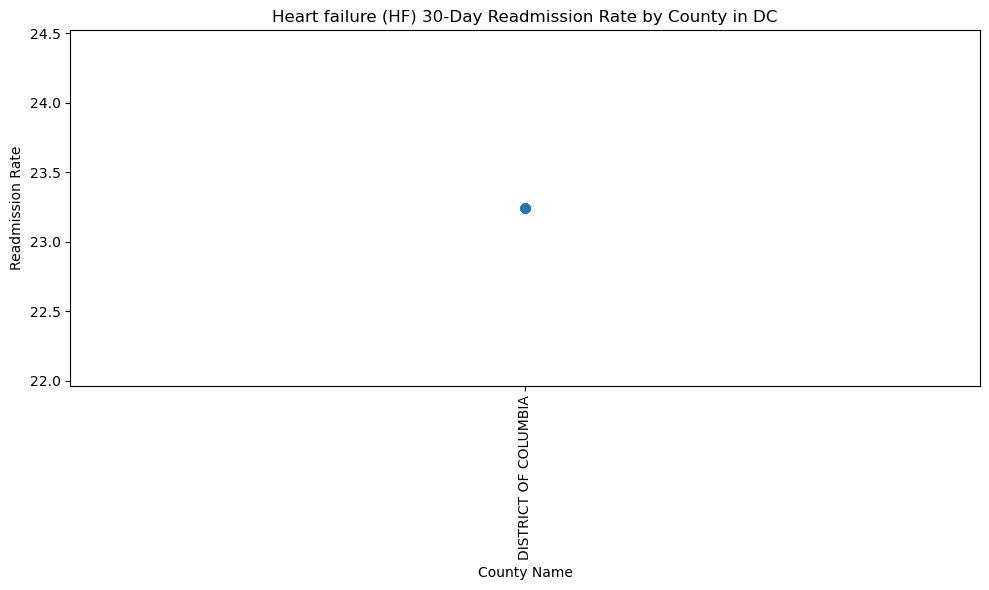

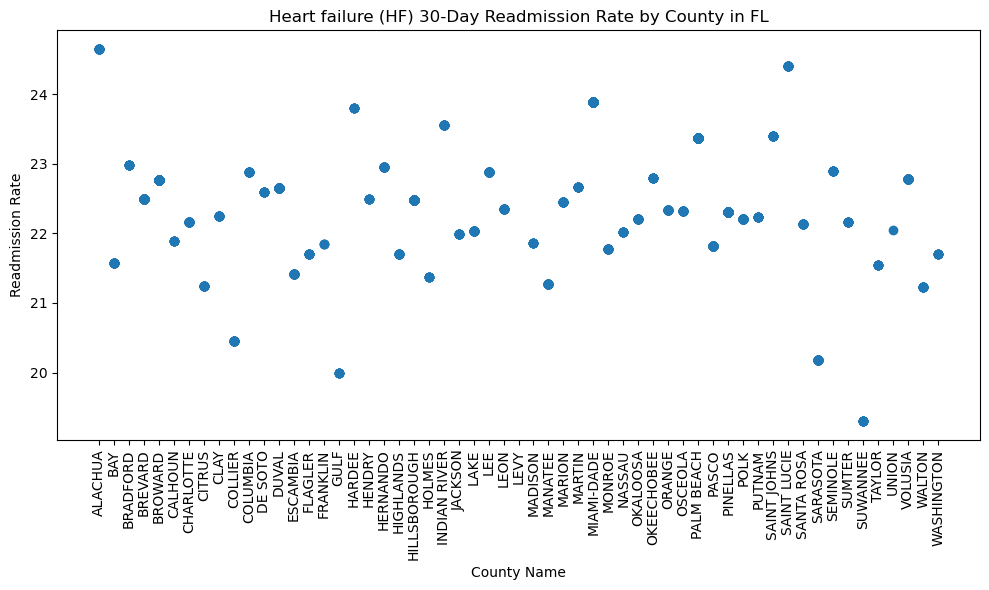

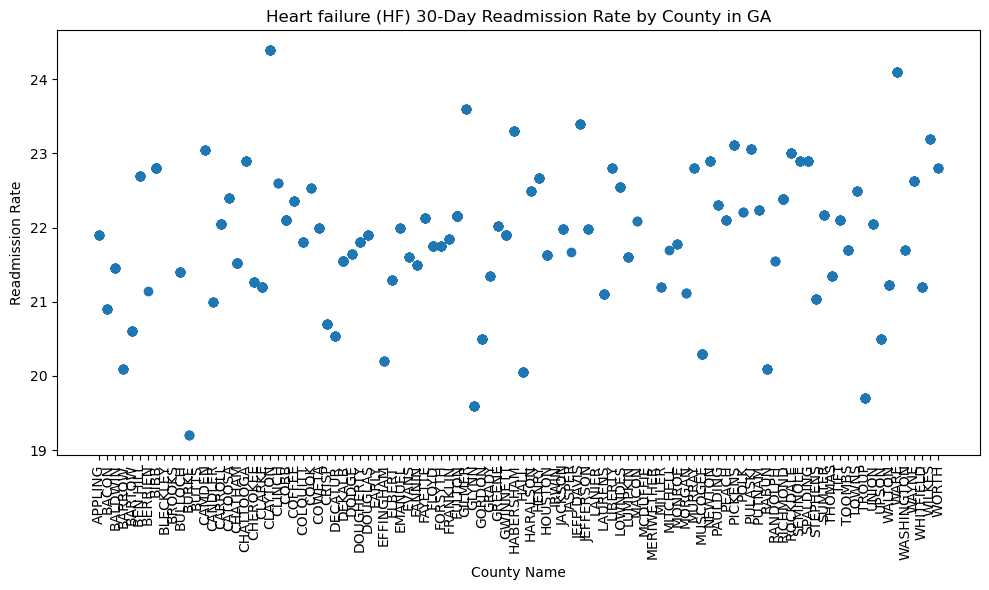

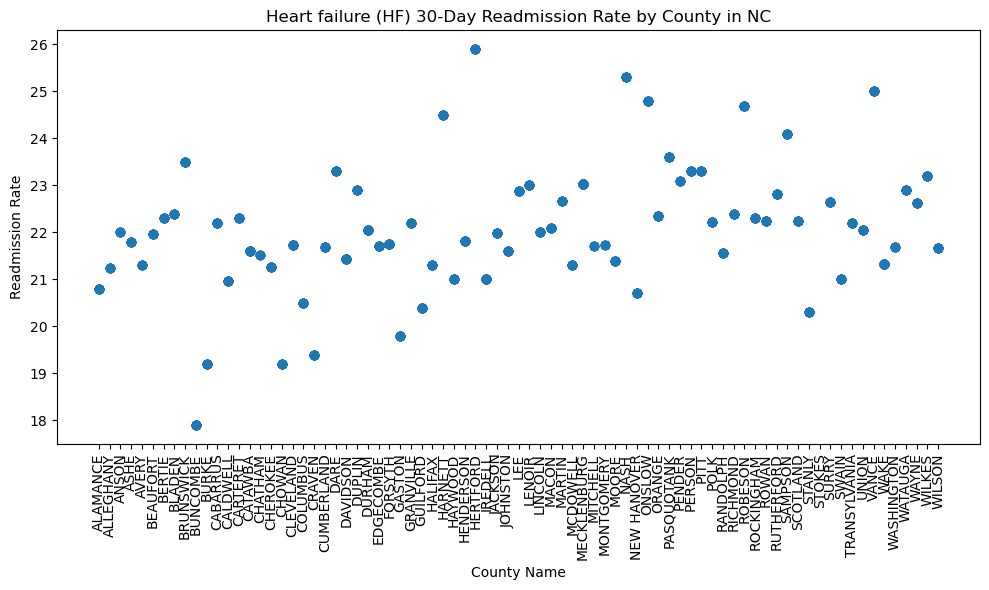

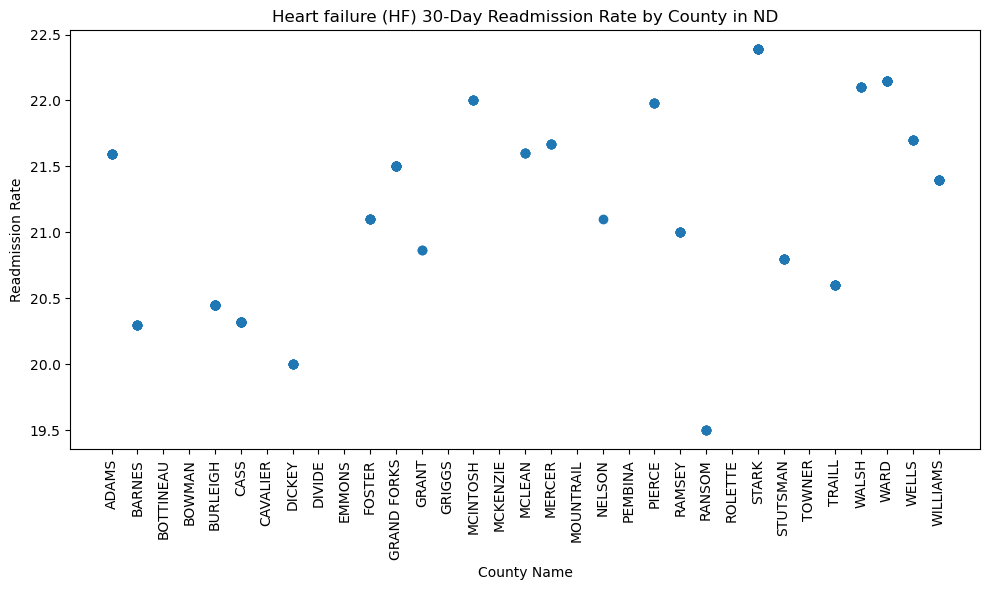

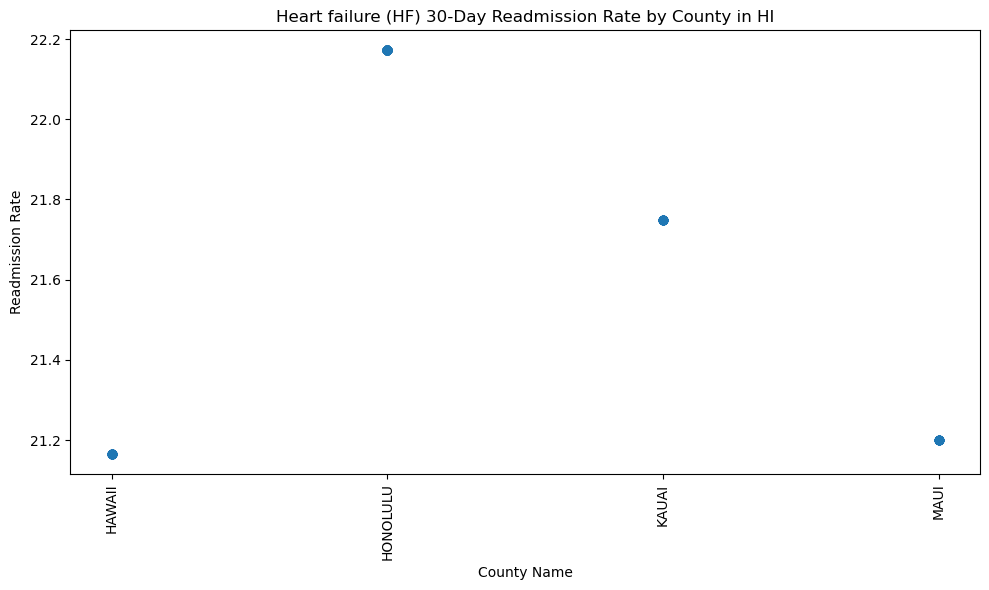

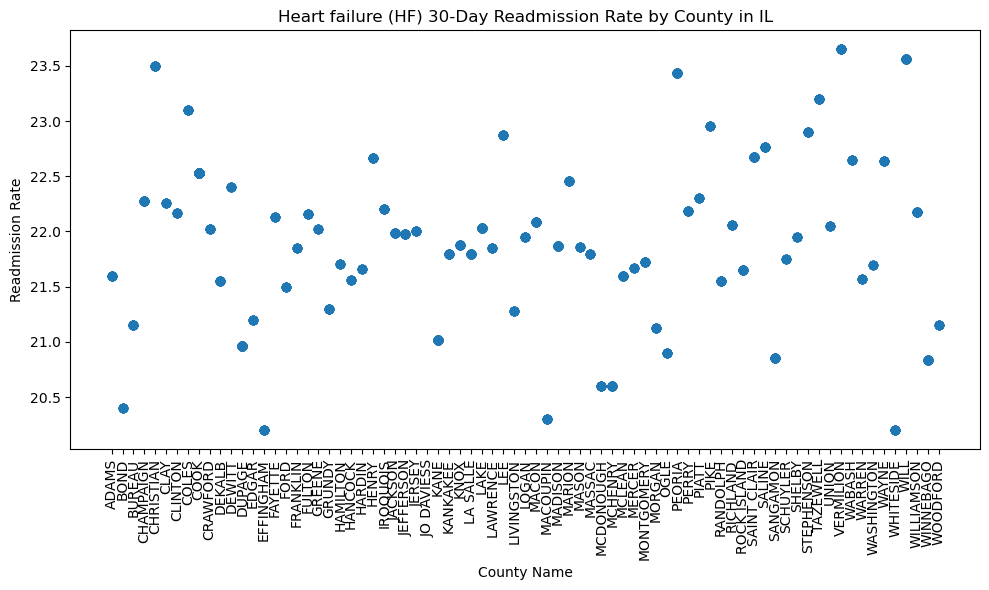

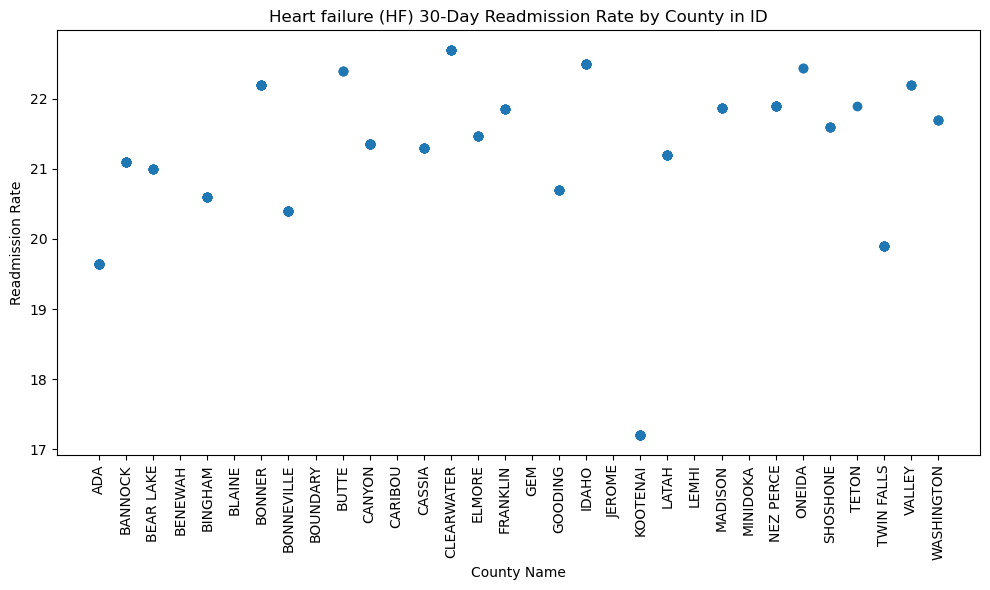

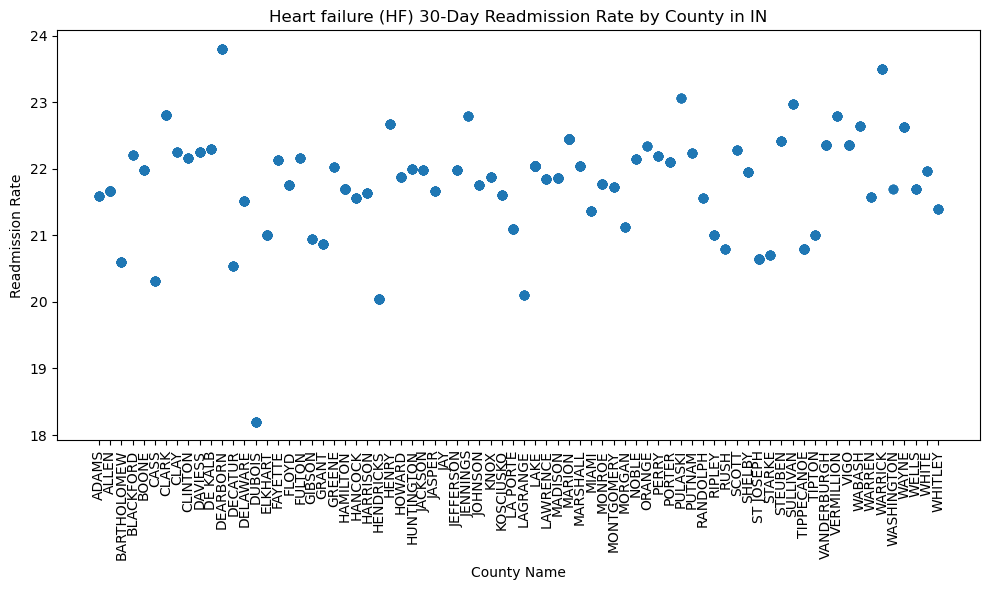

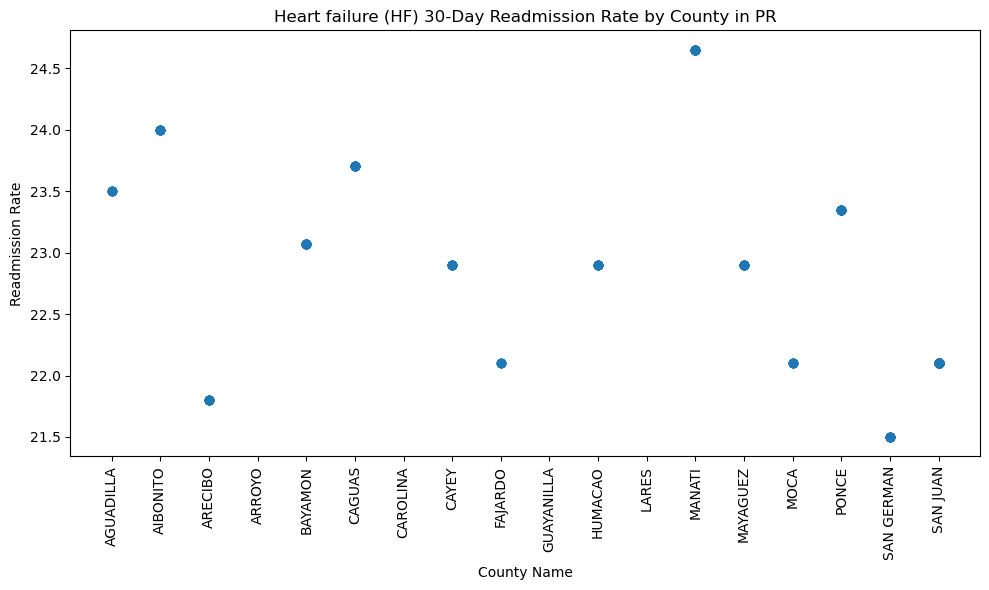

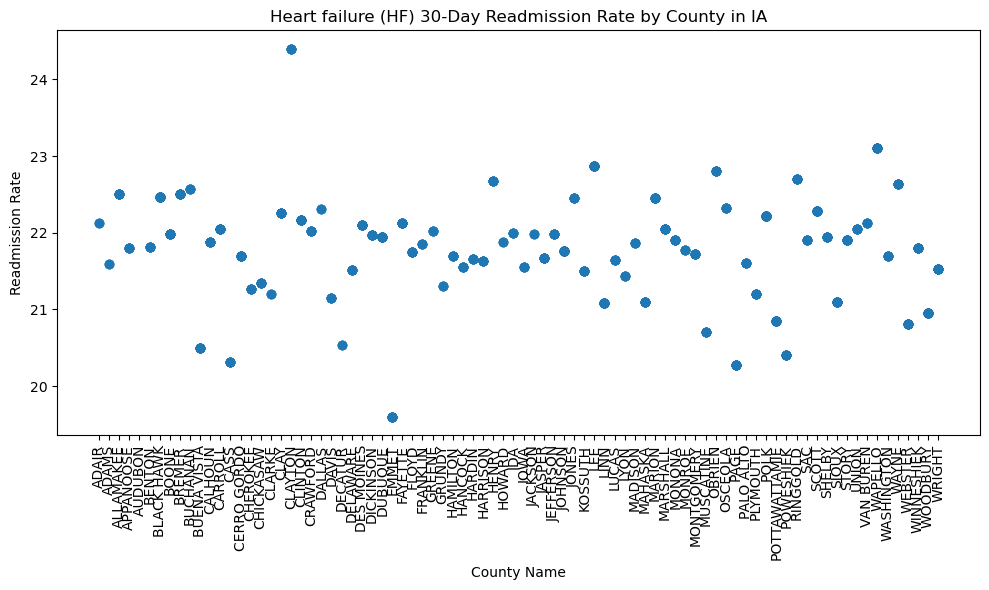

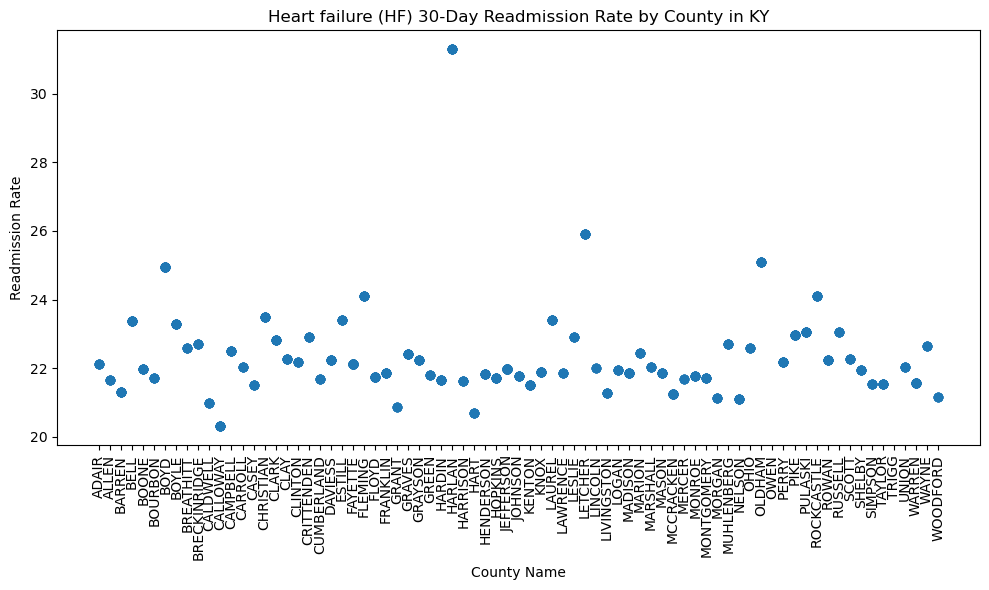

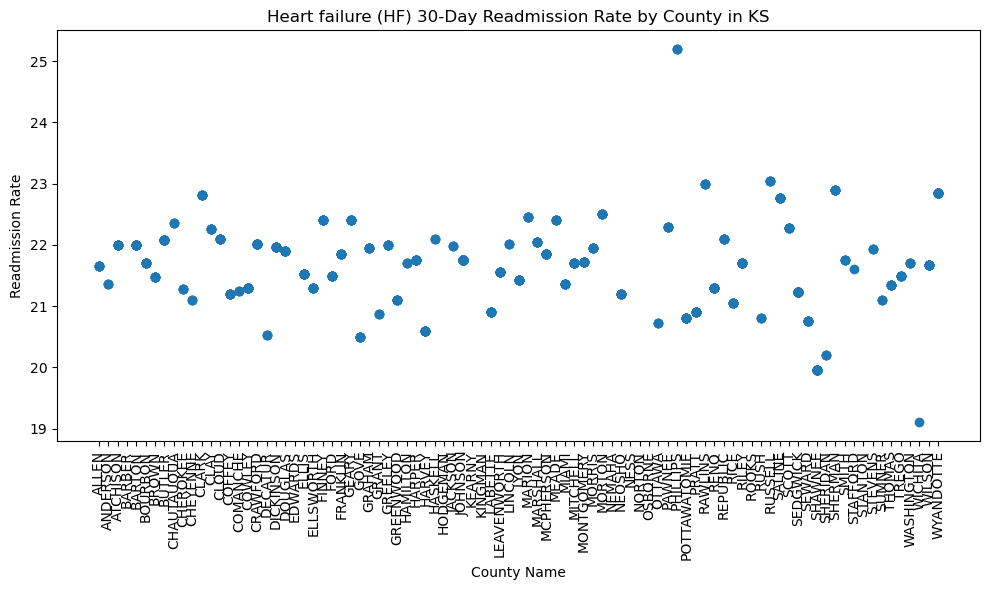

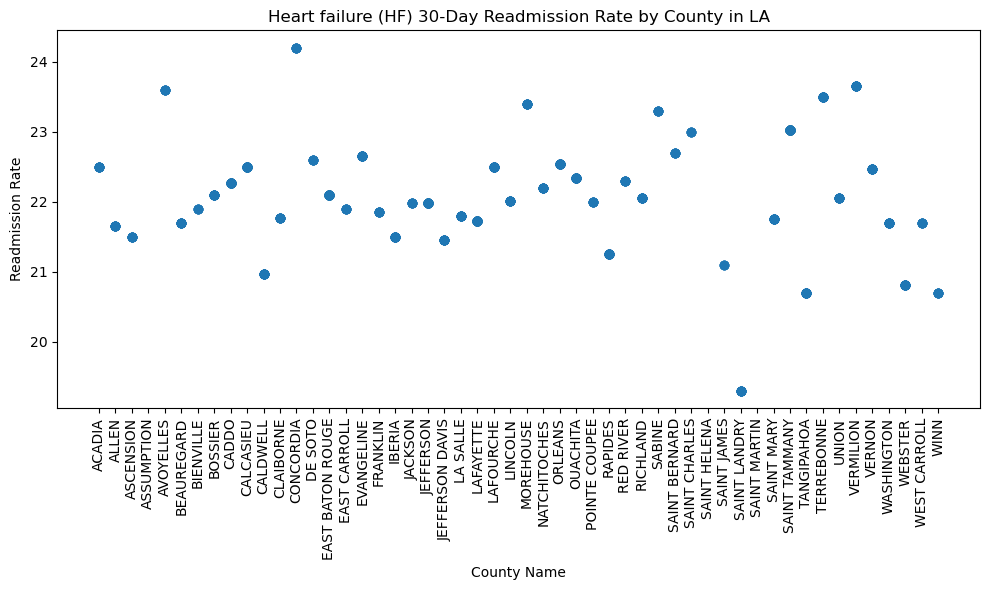

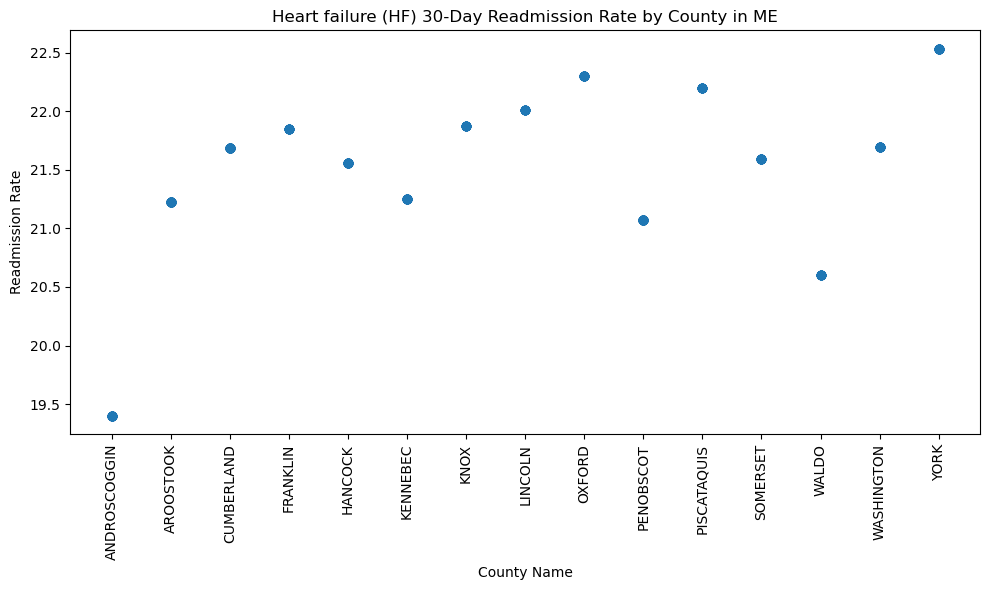

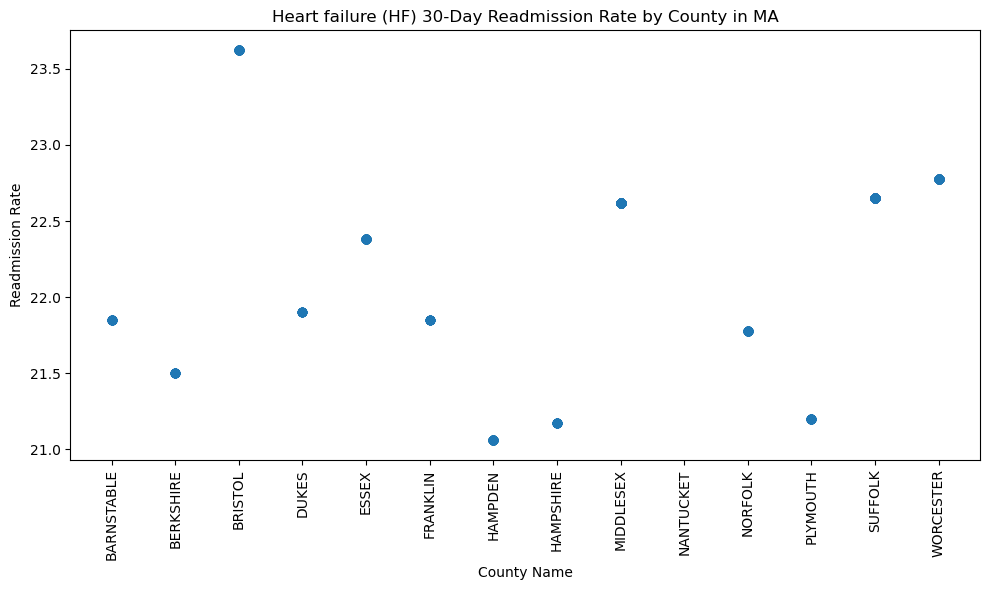

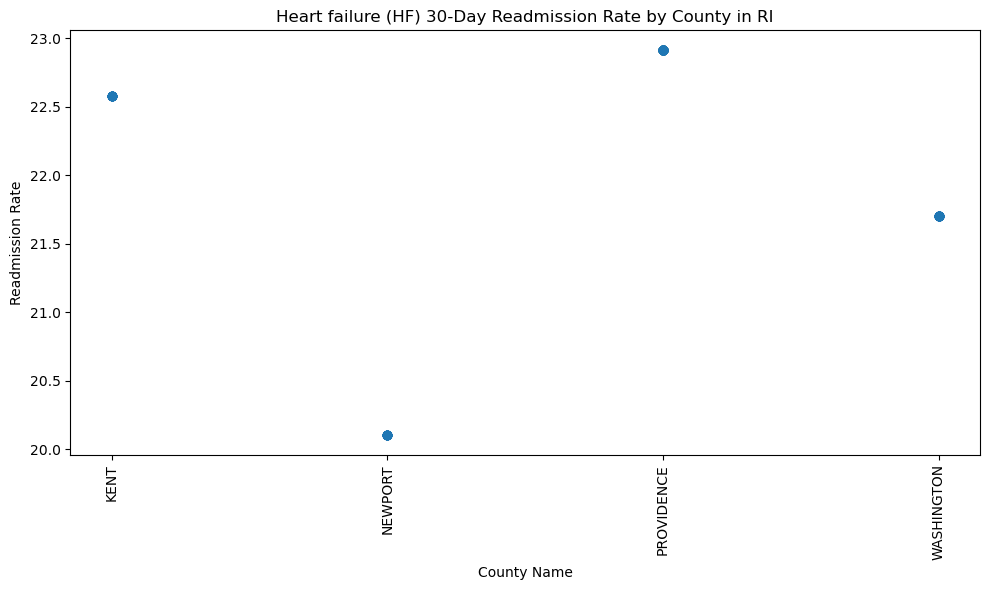

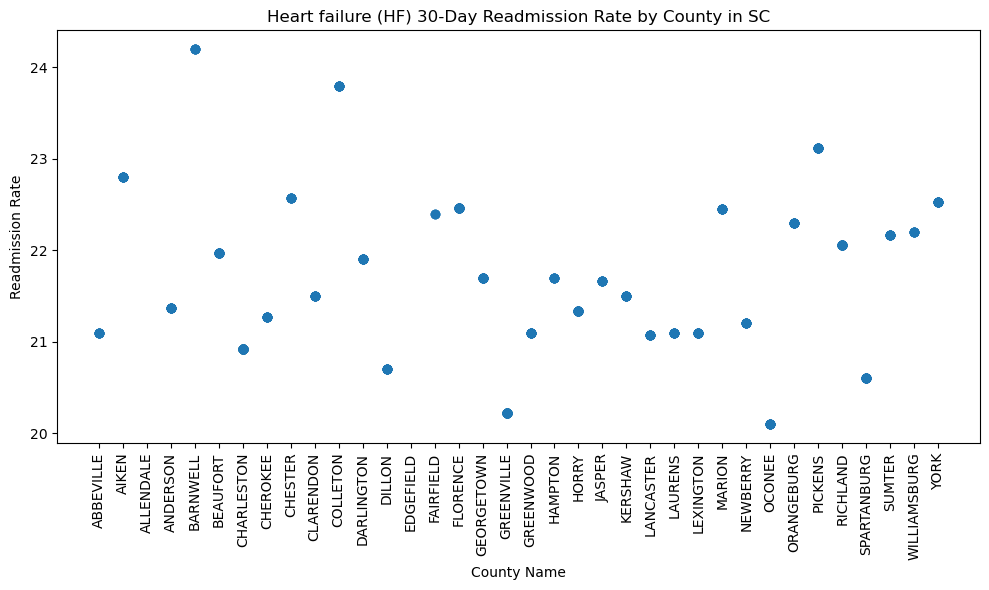

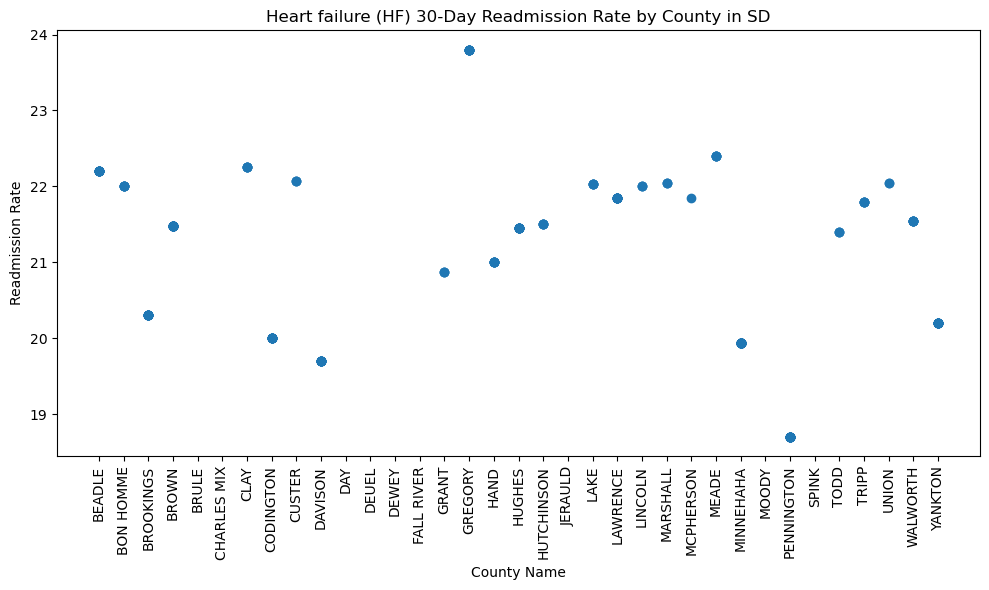

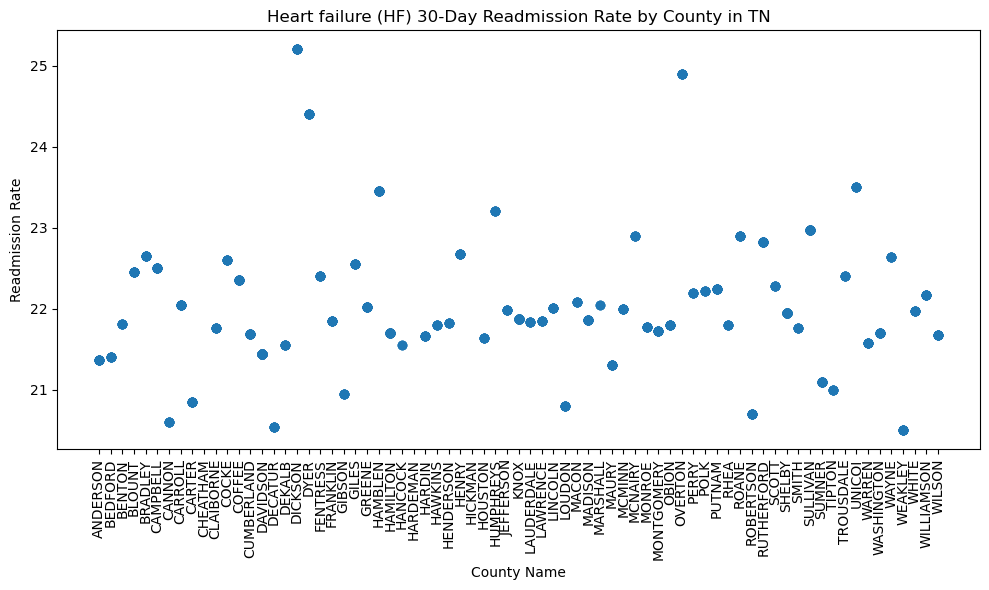

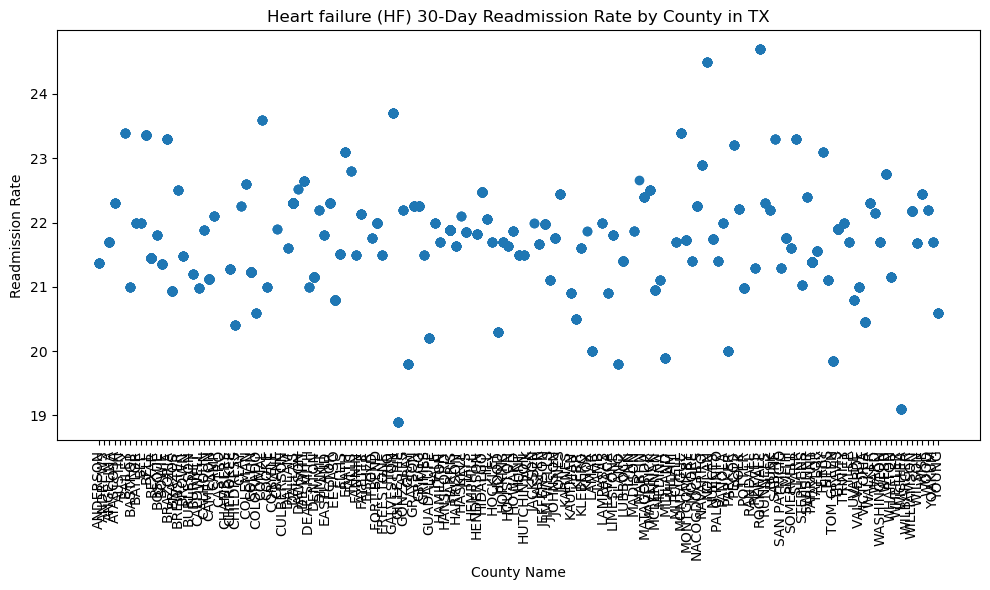

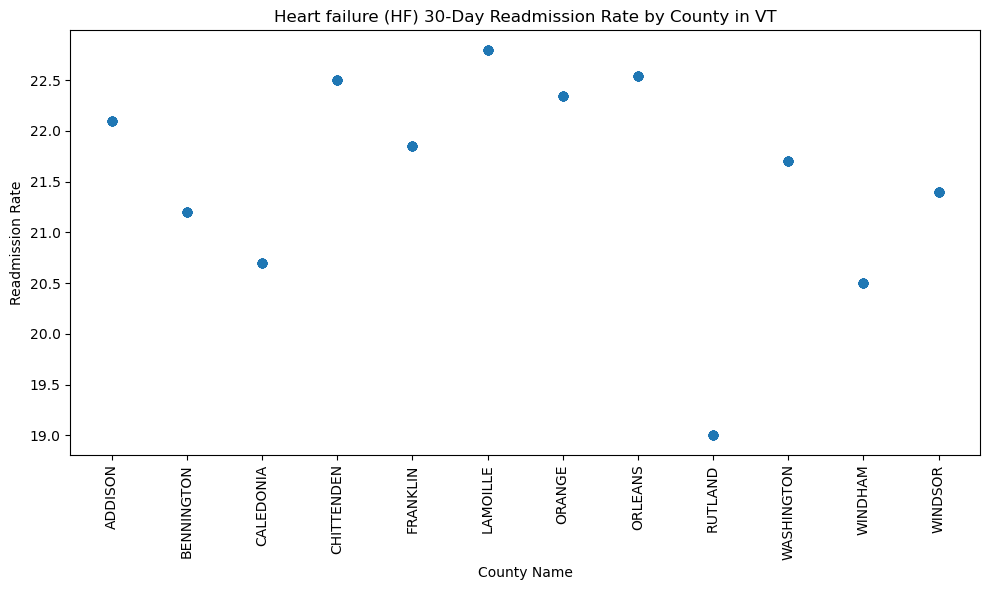

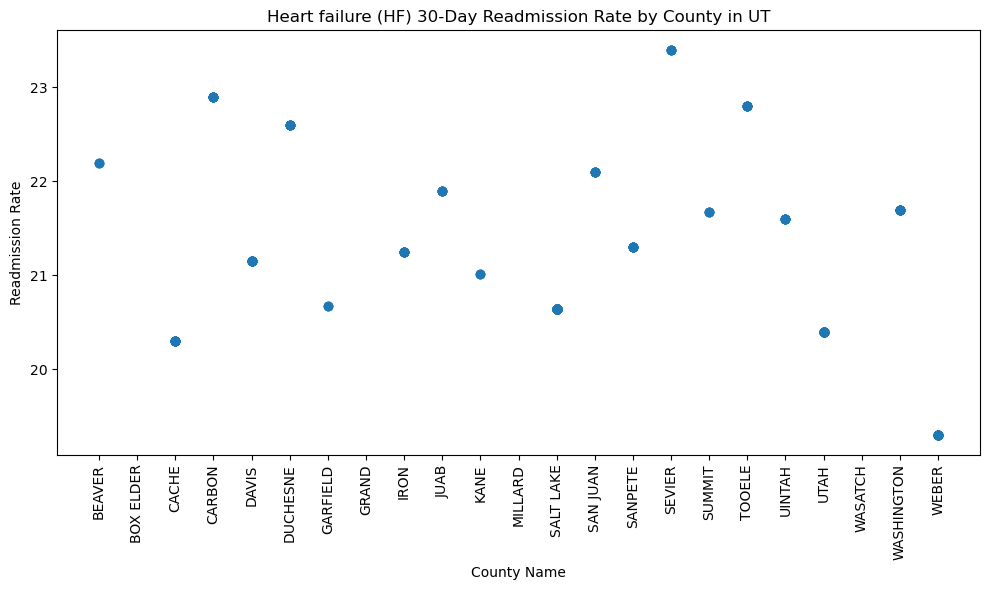

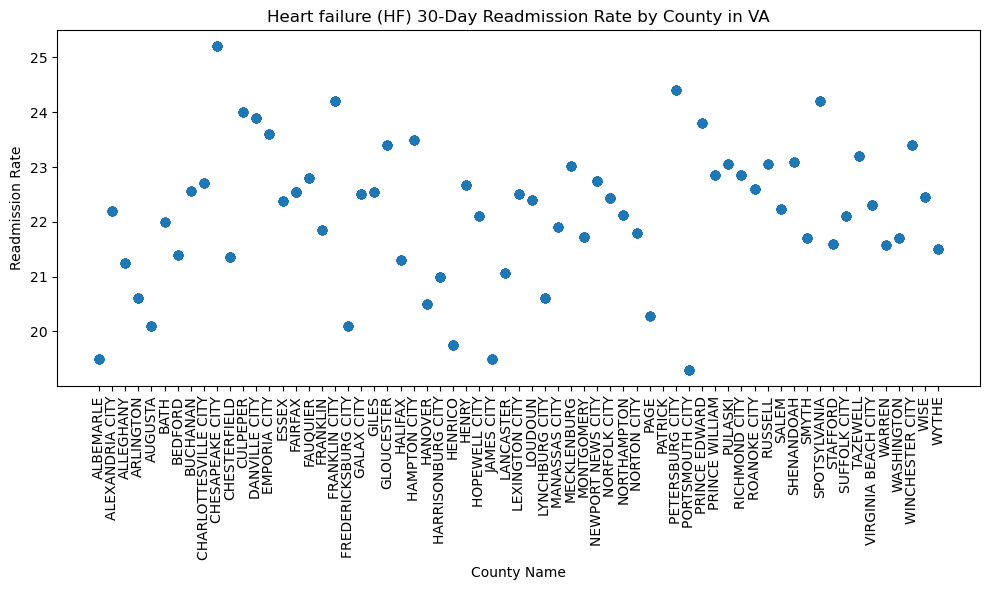

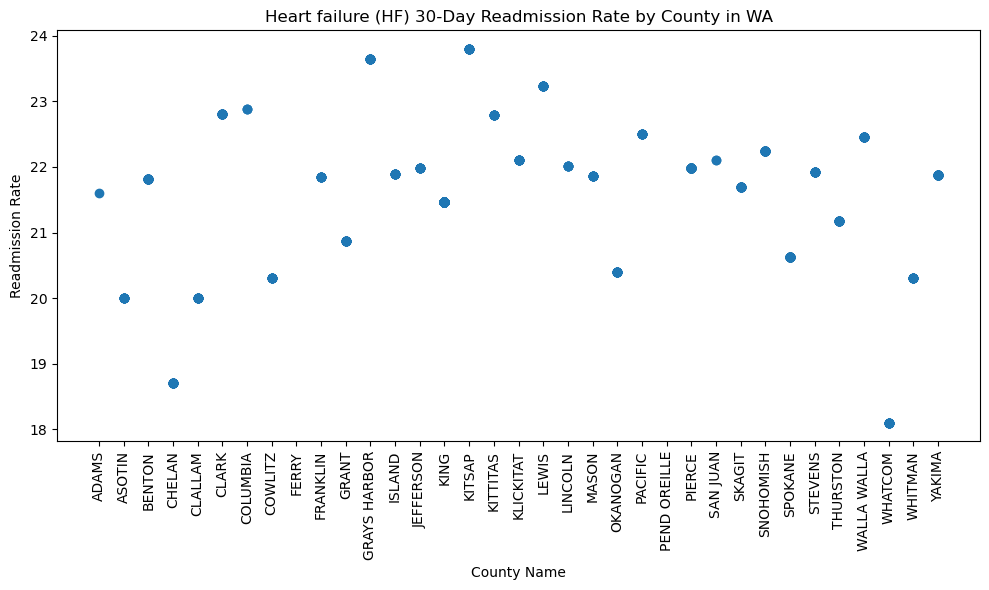

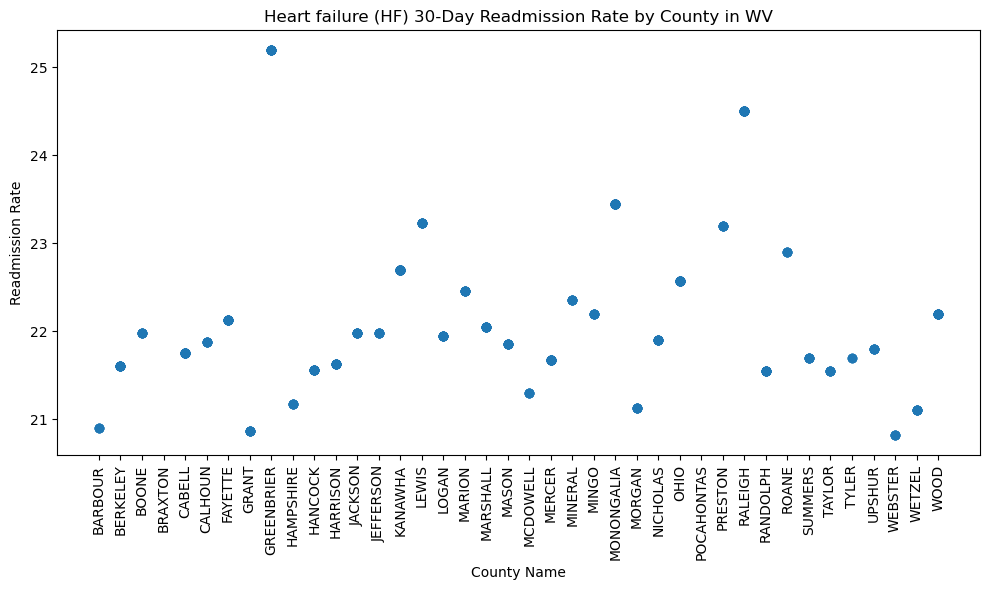

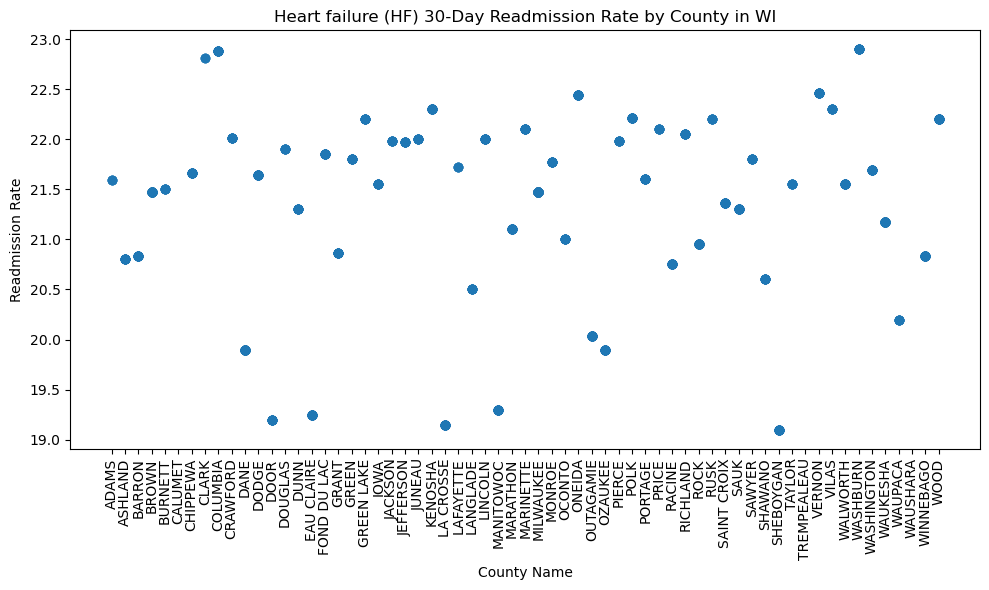

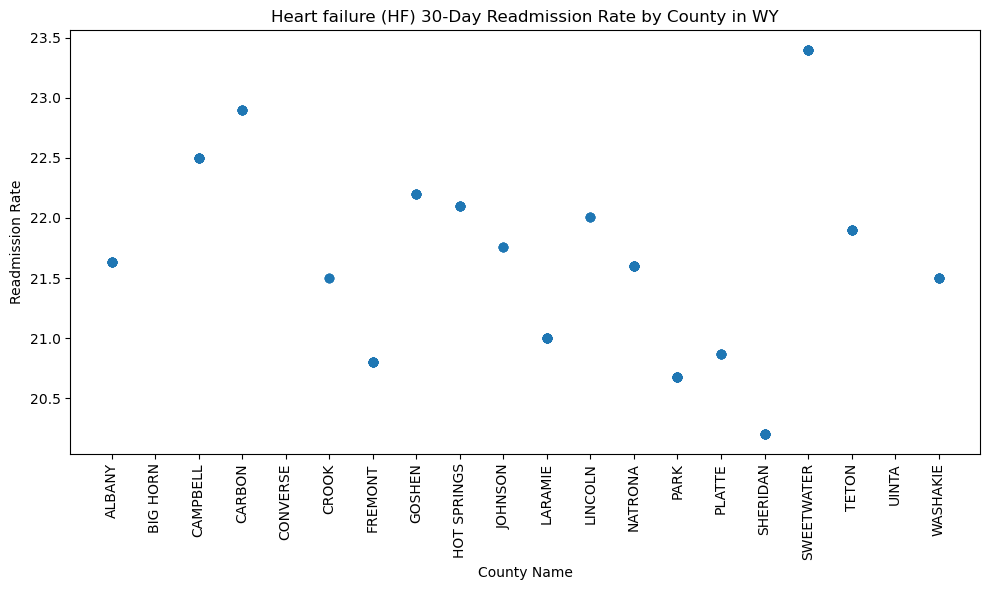

In [21]:
for state in unique_states:
    # Filter data for the current state
    state_data = heart_disease[heart_disease['State'] == state]
    
    # Create scatterplot
    plt.figure(figsize=(10, 6))
    plt.scatter(state_data['County Name'], state_data['Heart failure (HF) 30-Day Readmission Rate'])
    
    # Formatting the plot
    plt.title(f"Heart failure (HF) 30-Day Readmission Rate by County in {state}")
    plt.xlabel('County Name')
    plt.ylabel('Readmission Rate')
    plt.xticks(rotation=90)  # Rotate county names for better readability
    plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
    
    # Show/save the plot
    plt.show()

In [22]:
county_data = pd.read_csv('counties_per_capita_income.csv')
county_data.head()

county      states      pci household_income family_income  \
0    New York County    New York  $76,592          $69,659       $86,553   
1          Arlington    Virginia  $62,018         $103,208      $139,244   
2  Falls Church City    Virginia  $59,088         $120,000      $152,857   
3              Marin  California  $56,791          $90,839      $117,357   
4        Santa Clara  California  $56,248         $124,055      $124,055   

  population num_of_households  
0  1,628,706           759,460  
1    214,861            94,454  
2     12,731             5,020  
3    254,643           102,912  
4  1,927,852           640,215

In [23]:
county_data.groupby('states').head()

county                    states      pci household_income  \
0       New York County                  New York  $76,592          $69,659   
1             Arlington                  Virginia  $62,018         $103,208   
2     Falls Church City                  Virginia  $59,088         $120,000   
3                 Marin                California  $56,791          $90,839   
4           Santa Clara                California  $56,248         $124,055   
...                 ...                       ...      ...              ...   
3187      Swains Island            American Samoa   $9,586          $27,500   
3188             Saipan  Northern Mariana Islands   $9,586          $19,607   
3227   Western District            American Samoa   $6,429          $24,705   
3228   Eastern District            American Samoa   $6,191          $23,350   
3230    Manu’a District            American Samoa   $5,441          $17,614   

     family_income population num_of_households  
0          $86,553  1,628,706           759,460  
1         $139,244    214,861            94,454  
2         $152,857     12,731             5,020  
3         $117,357    254,643           102,912  
4         $124,055  1,927,852           640,215  
...            ...        ...               ...  
3187       $32,500         17                 6  
3188       $22,086     48,220            14,406  
3227       $24,916     31,329             5,418  
3228       $24,911     23,030             3,982  
3230       $19,226      1,143               282  

[264 rows x 7 columns]

In [24]:
county_data.describe()

county states      pci household_income family_income  \
count                3231   3231     3231             3231          3231   
unique               1940     55     2955             3085          3089   
top     Washington County  Texas  $23,809          $43,649       $58,875   
freq                   30    254        4                3             4   

       population num_of_households  
count        3231              3231  
unique       3160              3092  
top        21,645             3,542  
freq            3                 3

In [25]:
county_data.isna().sum()

county               0
states               0
pci                  0
household_income     0
family_income        0
population           0
num_of_households    0
dtype: int64

In [26]:
county_data['pci'] = county_data['pci'].str.replace('$', '').str.replace(',', '')
county_data['pci'] = pd.to_numeric(county_data['pci'], errors='coerce').astype('Int64')

county_data['household_income'] = county_data['household_income'].str.replace('$', '').str.replace(',', '')
county_data['household_income'] = pd.to_numeric(county_data['household_income'], errors='coerce').astype('Int64')

county_data['family_income'] = county_data['family_income'].str.replace('$', '').str.replace(',', '')
county_data['family_income'] = pd.to_numeric(county_data['family_income'], errors='coerce').astype('Int64')

In [27]:
county_data['population'] = pd.to_numeric(county_data['population'], errors='coerce') 

In [28]:
county_data['num_of_households'] = pd.to_numeric(county_data['num_of_households'], errors='coerce') 

In [29]:
county_data.dtypes

county                object
states                object
pci                    Int64
household_income       Int64
family_income          Int64
population           float64
num_of_households    float64
dtype: object

In [30]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [31]:
for index, row in county_data.iterrows():
    full_state_name = row['states']
    # Update the state name with its abbreviation in all caps
    county_data.at[index, 'states'] = us_state_to_abbrev [full_state_name].upper()

In [32]:
county_data['states'].head()

0    NY
1    VA
2    VA
3    CA
4    CA
Name: states, dtype: object

In [33]:
st_list1 = heart_disease['State'].unique()
st_list2 = county_data['states'].unique()

set1 = set(st_list1)
set2 = set(st_list2)
difference1 = set2 - set1
difference2 = set1 - set2
print(difference1)
print(difference2)

{'MD', 'GU', 'AS', 'MP', 'VI'}
{'DC'}


In [34]:
heart_disease = heart_disease.rename(columns={'State': 'states', 'County Name': 'county'})

In [35]:
# List of states to be removed
states_to_remove = ['VI', 'AS', 'MD', 'GU', 'MP']

# Drop rows where 'states' column contains any of the states in states_to_remove
county_data = county_data[~county_data['states'].isin(states_to_remove)]

In [36]:
print(county_data['states']
     .unique())

['NY' 'VA' 'CA' 'CO' 'NM' 'NJ' 'TX' 'CT' 'MA' 'AK' 'HI' 'WY' 'UT' 'PA'
 'WI' 'TN' 'RI' 'OH' 'WA' 'IN' 'KS' 'ND' 'IL' 'NH' 'MN' 'FL' 'GA' 'MI'
 'SD' 'IA' 'ID' 'MO' 'NC' 'NV' 'KY' 'AL' 'VT' 'MS' 'MT' 'ME' 'OR' 'SC'
 'DE' 'NE' 'LA' 'WV' 'OK' 'AR' 'AZ' 'PR']


In [37]:
heart_disease = heart_disease[heart_disease['states'] != 'DC']

In [38]:
county_data['county'] = county_data['county'].str.upper()

In [39]:
heart_disease['county'].describe()

count           41634
unique           1485
top       LOS ANGELES
freq              770
Name: county, dtype: object

In [40]:
county_data['county'].describe()

count                  3196
unique                 1917
top       WASHINGTON COUNTY
freq                     29
Name: county, dtype: object

In [41]:
heart_disease['county'].unique()

array(['ABBEVILLE', 'ACADIA', 'ADA', ..., 'YOUNG', 'YUBA', 'YUMA'],
      dtype=object)

In [42]:
!pip install thefuzz

In [43]:
!pip install fuzzywuzzy

In [44]:
from fuzzywuzzy import process
from fuzzywuzzy import fuzz

C:\Users\tarab\anaconda3\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
# Define a function to match and return the closest match of county names
def match_county(county, choices, scorer=fuzz.ratio):
    match = process.extractOne(county, choices, scorer=scorer)
    if match:
        return match[0]
    return None

# Create a new column in heart_disease with matched county names from county_data
heart_disease['matched_county'] = heart_disease['county'].apply(
    lambda x: match_county(x, county_data['county'])
)
  
# Merge the dataframes on the matched county names
merged_df = pd.merge(
    heart_disease,
    county_data,
    left_on='matched_county',
    right_on='county',
    how='left'
)

# Drop the temporary 'matched_county' column if not needed
merged_df.drop('matched_county', axis=1, inplace=True)

In [ ]:
merged_df.head()

In [ ]:
merged_df.isna().sum()

In [ ]:
merged_df = merged_df.dropna(subset=['Heart failure (HF) 30-Day Mortality Rate', 'Heart failure (HF) 30-Day Readmission Rate'])

In [ ]:
# Calculate the correlation matrix
correlation_matrix = merged_df.corr(numeric_only=True)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

categorical_cols = merged_df.select_dtypes(include=['object']).columns
df = pd.get_dummies(merged_df, columns=categorical_cols)

# Standardize the magnitude of numeric features[^2^][2]
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = preprocessing.StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Split into testing and training datasets[^5^][5]
X = df.drop(['Heart failure (HF) 30-Day Mortality Rate','population','num_of_households'], axis=1)  # Replace 'target_column' with your actual target column name
y = df['Heart failure (HF) 30-Day Mortality Rate']  # Replace 'target_column' with your actual target column name
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

In [ ]:
# Initialize the models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)  # Alpha is the regularization strength
lasso_model = Lasso(alpha=0.1)
tree_model = DecisionTreeRegressor(max_depth=5)  # Max depth is set to 5 for simplicity

In [ ]:
# Fit the models to the training data
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)

In [ ]:
# Evaluate the models using cross-validation
linear_scores = cross_val_score(linear_model, X_train, y_train, scoring='R2', cv=5)
ridge_scores = cross_val_score(ridge_model, X_train, y_train, cv=5)
lasso_scores = cross_val_score(lasso_model, X_train, y_train, cv=5)
tree_scores = cross_val_score(tree_model, X_train, y_train, cv=5)

In [194]:
# Print the mean and standard deviation of the cross-validation scores
print("Linear Regression: Mean =", np.mean(linear_scores), "Std =", np.std(linear_scores))
print("Ridge Regression: Mean =", np.mean(ridge_scores), "Std =", np.std(ridge_scores))
print("Lasso Regression: Mean =", np.mean(lasso_scores), "Std =", np.std(lasso_scores))
print("Decision Tree Regressor: Mean =", np.mean(tree_scores), "Std =", np.std(tree_scores))

Linear Regression: Mean = nan Std = nan
Ridge Regression: Mean = 0.9983322691551259 Std = 0.001211260455745617
Lasso Regression: Mean = 0.006900830376876721 Std = 0.00025917203515823104
Decision Tree Regressor: Mean = 0.23622497531293307 Std = 0.0027776765470999085


Based on the provided results, the Ridge Regression model would be the best to use moving forward. Here’s why:

- High Mean Score: It has the highest mean score of 0.9983, indicating excellent performance on the dataset.
- Low Standard Deviation: The standard deviation is very low (0.0012), which suggests that the model’s performance is consistent across different subsets of the data.
- Reliability: Compared to the other models, Ridge Regression provides a reliable prediction with less variance, making it a stable choice for your analysis.

The Lasso Regression has a very low mean score, and the Decision Tree Regressor has a significantly lower mean score than Ridge Regression and a higher standard deviation, indicating less consistent performance. The Linear Regression model’s results are not available (NaN), so it cannot be compared. Ridge Regression is the most suitable model among the ones listed.

In [195]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [196]:
y_pred = ridge_model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.008532852706342166
Mean Squared Error (MSE): 0.0006026141262596698
R-squared (R²): 0.9993963812584779


Based on the provided data, I can deduce the following:

- MAE (Mean Absolute Error): The average absolute error is 0.0085, indicating that, on average, the model’s predictions are about 0.0085 units away from the actual values. This suggests a high level of accuracy in the predictions.
- MSE (Mean Squared Error): The average squared error is 0.0006, which is quite low. Since MSE gives more weight to larger errors (by squaring the differences), a low MSE indicates that there are no large errors in the predictions.
- R² (R-squared): The R² value is 0.9994, which is very close to 1. This indicates that the model explains approximately 99.94% of the variability in the response variable, suggesting an excellent fit to the data.

Overall, these metrics suggest that the model has a high predictive accuracy and fits the data very well. However, it’s important to consider the context of the data and the model’s application to ensure these metrics are meaningful for my specific use case.

In [2]:
pip install geopandas matplotlib

   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   --------------------------------------- 323.6/323.6 kB 10.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.9 MB ? eta -:--:--
   --- ------------------------------------ 1.3/15.9 MB 41.6 MB/s eta 0:00:01
   ---------- ----------------------------- 4.3/15.9 MB 55.0 MB/s eta 0:00:01
   ---------------------- ----------------- 8.9/15.9 MB 63.0 MB/s eta 0:00:01
   ----------------------------- ---------- 11.9/15.9 MB 81.8 MB/s eta 0:00:01
   ------------------------------------- -- 14.9/15.9 MB 73.1 MB/s eta 0:00:01
   ---------------------------------------  15.9/15.9 MB 72.6 MB/s eta 0:00:01
   ---------------------------------------- 15.9/15.9 MB 54.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.1 MB ? eta -:--:--
   ------------- -------------------------- 2.1/6.1 MB 45.1 MB/s eta 0:00:01
   --------------------------------- ------ 5.1/6.1 MB 53.7 MB/s eta 0:00:01
   ---

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Load your data
data = pd.read_csv('Readmissions_and_Deaths.csv')  # make sure to have 'county' and 'rate' columns

# Load geographical data (shapefile of counties)
counties = gpd.read_file('gz_2010_us_050_00_20m.shp')  # This is a sample path

# Merge the data with the geographical data
map_data = counties.merge(data, left_on='NAME', right_on='county')

DataSourceError: gz_2010_us_050_00_20m.shp: No such file or directory